<a href="https://colab.research.google.com/github/SaNDeeP-bot-ui/Crickast_ProductClub_Summer_project/blob/main/crickast_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import the core libraries for data manipulation, numerical operations, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pandas as pd
# The file path to the dataset
# Note: This should be replaced with the actual path to your file.
file_path = r'/content/664389efa0868_match_level_scorecard.csv'

# Correctly load the dataset using pandas, ensuring the first column is not treated as the index.
# This directly solves the problem shown in the user's image comparison.
try:
    df = pd.read_csv(file_path, index_col=False)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found. Please check the path and try again.")
    # Exit or create a dummy dataframe if the file is not found
    df = pd.DataFrame() # Create an empty DataFrame to avoid errors in subsequent cells

# Display the first few rows to confirm the correct structure
if not df.empty:
    display(df.head())

Dataset loaded successfully.


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,...,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,...,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,...,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,...,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,...,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0


In [30]:
if not df.empty:
    # Display the first 5 rows
    print("First 5 rows of the dataset:")
    display(df.head())

    # Display the last 5 rows
    print("\nLast 5 rows of the dataset:")
    display(df.tail())

    # Get a concise summary of the DataFrame
    print("\nDataFrame Info:")
    df.info()

    # Generate descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    display(df.describe())

    # Count missing values in each column
    print("\nMissing Values Count:")
    print(df.isnull().sum())

First 5 rows of the dataset:


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,...,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,...,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,...,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,...,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,...,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0



Last 5 rows of the dataset:


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
1684,9128601,Pb Ks,Ci Sr Ks,Pb Ks,runs,11.0,Ci Sr Ks,field,We Sm Mi,Mumbai,...,176.0,6.0,126.0,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,In Pr Le,30407,197658.0
1685,9433241,Mx,St,St,wickets,9.0,St,field,Te Cr As Cy Gd Tn,Taunton,...,142.0,2.0,81.0,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,other_domestic,9701,NaN
1686,9097227,Bd,Wn Pe,Wn Pe,wickets,6.0,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,...,143.0,4.0,105.0,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,other_domestic,23869,323049.0
1687,9516695,Rn Rs,Ss Hd,Ss Hd,wickets,4.0,Rn Rs,bat,Si Mh Sm Jr,Jaipur,...,217.0,6.0,125.0,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,In Pr Le,36014,5764576.0
1688,9433633,He,Ge,Ge,wickets,8.0,Ge,field,Cy Gd Bl,Bristol,...,85.0,2.0,51.0,7727,4223883.0:2076192.0:8822729.0:5241564.0:202033...,7608,4898074.0:3220566.0:8048074.0:6988596.0:807294...,other_domestic,7608,NaN



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match id                1689 non-null   int64  
 1   team1                   1689 non-null   object 
 2   team2                   1689 non-null   object 
 3   winner                  1689 non-null   object 
 4   by                      1689 non-null   object 
 5   win amount              1689 non-null   float64
 6   toss winner             1689 non-null   object 
 7   toss decision           1689 non-null   object 
 8   venue                   1689 non-null   object 
 9   city                    1511 non-null   object 
 10  match_dt                1689 non-null   object 
 11  lighting                1689 non-null   object 
 12  series_name             1689 non-null   object 
 13  season                  1689 non-null   object 
 14  ground_id              

,match id,win amount,ground_id,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team2_id,winner_id,player_of_the_match_id
count,1.689000e+03,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1.175000e+03
mean,9.095420e+06,20.910006,7614.241563,160.898757,6.580817,121.571344,143.437537,6.052694,110.975133,21282.439905,21358.606868,21069.650681,3.782927e+06
std,3.200556e+05,26.772943,7145.365946,34.867111,2.089981,10.244107,33.158063,2.887536,17.932089,16785.986280,16806.561577,16693.728395,2.349850e+06
min,8.587795e+06,1.000000,83.000000,40.000000,0.000000,30.000000,15.000000,0.000000,22.000000,20.000000,20.000000,20.000000,3.406100e+04
25%,8.778685e+06,6.000000,1525.000000,140.000000,5.000000,122.000000,123.000000,4.000000,104.000000,7727.000000,7608.000000,7727.000000,2.089079e+06
50%,9.084690e+06,8.000000,5004.000000,162.000000,7.000000,124.000000,145.000000,6.000000,117.000000,17583.000000,17583.000000,15497.000000,3.252395e+06
75%,9.377248e+06,27.000000,13530.000000,183.000000,8.000000,126.000000,166.000000,9.000000,123.000000,36070.000000,36070.000000,36014.000000,5.490596e+06
max,9.887863e+06,168.000000,25479.000000,275.000000,11.000000,135.000000,259.000000,11.000000,136.000000,49657.000000,49657.000000,49657.000000,9.362702e+06



Missing Values Count:
match id                    0
team1                       0
team2                       0
winner                      0
by                          0
win amount                  0
toss winner                 0
toss decision               0
venue                       0
city                      178
match_dt                    0
lighting                    0
series_name                 0
season                      0
ground_id                   0
umpire1                   181
umpire2                   181
inning1_runs                0
inning1_wickets             0
inning1_balls               0
inning2_runs                0
inning2_wickets             0
inning2_balls               0
team1_id                    0
team1_roster_ids            0
team2_id                    0
team2_roster_ids            0
series_type                 0
winner_id                   0
player_of_the_match_id    514
dtype: int64


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# List of columns to remove from the analysis
columns_to_drop = ["player_of_the_match_id","umpire1","umpire2","city"]

# Create a copy to preserve the original DataFrame for reference
df_cleaned = df.copy()

# Drop the specified columns
# The errors='ignore' parameter prevents an error if a column in the list is not found
df_cleaned.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print("Columns after dropping:")
print(df_cleaned.columns)

Columns after dropping:
Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'inning1_runs', 'inning1_wickets',
       'inning1_balls', 'inning2_runs', 'inning2_wickets', 'inning2_balls',
       'team1_id', 'team1_roster_ids', 'team2_id', 'team2_roster_ids',
       'series_type', 'winner_id'],
      dtype='object')


In [33]:
# Standardize column names to lowercase (snake_case)
df_cleaned.columns = [col.lower() for col in df_cleaned.columns]

print("\nStandardized column names:")
print(df_cleaned.columns)


Standardized column names:
Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'inning1_runs', 'inning1_wickets',
       'inning1_balls', 'inning2_runs', 'inning2_wickets', 'inning2_balls',
       'team1_id', 'team1_roster_ids', 'team2_id', 'team2_roster_ids',
       'series_type', 'winner_id'],
      dtype='object')


In [34]:
df['team1'].unique()

array(['Nn Ds', 'Me Rs', 'Sy Ss', 'Ht Hs', 'Ad', 'Ae Ss', 'Ph Ss',
       'Cl Ds', 'Me Ss', 'Sy Tr', 'Be Ht', 'Wn', 'Ba', 'Hl Ph', 'Pb',
       'Ta', 'Ka', 'Tl Nu', 'Am', 'Gt', 'Oa', 'Cy', 'Ma Ph', 'Aa', 'Va',
       'Ss', 'Py', 'Ma', 'Br', 'Mm', 'Di', 'Ur Ph', 'Ch', 'Al Ph', 'Sm',
       'Rn', 'Sa', 'Oo', 'Jd', 'Hd Ia', 'Mi', 'Nd', 'Mr', 'Ud', 'Ju  Kr',
       'Rs', 'Ga', 'Bl', 'Ha', 'Pn', 'Sh Aa', 'Ks', 'Ds', 'Qa Gs', 'Ws',
       'Ts', 'Pr Zi', 'Mn Ss', 'Nw Zd', 'Ce Cs', 'Ls', 'Ki Ks', 'Le Qs',
       'Id Ud', 'Si La', 'Ia', 'Ed', 'An', 'Mi Is', 'Ci Sr Ks',
       'Ka Kt Rs', 'Pb Ks', 'Rl Cs Be', 'Di Cs', 'Rn Rs', 'Ze', 'Ss Hd',
       'Kt', 'De', 'St', 'Bm Bs', 'Le', 'Sy', 'Ge', 'He', 'Dm', 'We',
       'Ne', 'Ex', 'Gn', 'Ye', 'Mx', 'Mr Rs', 'Nn Ks', 'Nt Ws', 'Lr Lg',
       'Wt Is', 'Sx', 'Ol Is', 'Ln St', 'Wh Fe', 'Sn Be', 'Bm Px',
       'Nn Ss', 'Tt Rs', 'Bh', 'Mr Os', 'St Ks ad Ns Ps', 'Ga An Ws',
       'Ja Ts', 'Bs Rs', 'St La Ks', 'To Kt Rs', 'Id', 'Sd', 'Pa Nw Ga',
       

In [35]:
df['series_type'].unique()

array(['other_domestic', 'international', 'In Pr Le'], dtype=object)

In [36]:
# Engineer the 'team_batting_first' and 'team_batting_second' columns
# np.where is a vectorized way of writing an if-else statement.
# Condition: df_cleaned['toss_decision'] == 'bat'
# If True: toss_winner is team_batting_first
# If False: toss_winner is team_batting_second, so the other team is team_batting_first

# Determine the team that batted first
df_cleaned['team_batting_first'] = np.where(
    df_cleaned['toss decision'] == 'bat',
    df_cleaned['toss winner'],
    np.where(df_cleaned['toss winner'] == df_cleaned['team1'], df_cleaned['team2'], df_cleaned['team1'])
)

# Determine the team that batted second
df_cleaned['team_batting_second'] = np.where(
    df_cleaned['toss decision'] == 'field',
    df_cleaned['toss winner'],
    np.where(df_cleaned['toss winner'] == df_cleaned['team1'], df_cleaned['team2'], df_cleaned['team1'])
)

# Display the new columns alongside the originals to verify the logic
print("Engineered columns for batting order:")
display(df_cleaned[['toss winner', 'toss decision', 'team_batting_first', 'team_batting_second']].head())

Engineered columns for batting order:


,toss winner,toss decision,team_batting_first,team_batting_second
0,Wn,field,Nn Ds,Wn
1,Sy Tr,field,Me Rs,Sy Tr
2,Sy Ss,bat,Sy Ss,Be Ht
3,Oo,field,Nn Ds,Oo
4,Me Ss,field,Ht Hs,Me Ss


In [37]:
# Find records that violate the win-by-runs logic
runs_win_anomaly = df_cleaned[(df_cleaned['by'] == 'runs') & (df_cleaned['winner']!= df_cleaned['team_batting_first'])]

# Find records that violate the win-by-wickets logic
wickets_win_anomaly = df_cleaned[(df_cleaned['by'] == 'wickets') & (df_cleaned['winner']!= df_cleaned['team_batting_second'])]

# Concatenate the anomalies into a single report
anomalies_report = pd.concat([runs_win_anomaly, wickets_win_anomaly])

if anomalies_report.empty:
    print("Data Integrity Check Passed: No logical anomalies found in win conditions.")
else:
    print("Data Integrity Check Failed: The following matches have logically inconsistent outcomes.")
    display(anomalies_report)

Data Integrity Check Failed: The following matches have logically inconsistent outcomes.


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,match_dt,...,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,team_batting_first,team_batting_second
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,2021-01-01,...,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,Me Rs,Sy Tr
163,8647708,Ws,Ds,Ds,runs,3.0,Ws,bat,Kd Dn,2021-02-21,...,2.0,109.0,23841,2667223.0:3396525.0:3009334.0:1963443.0:666546...,22763,3399745.0:2269833.0:3747764.0:2252452.0:223190...,other_domestic,22763,Ws,Ds
290,8751917,Mx,Ge,Ge,runs,2.0,Ge,field,Rt Ct Cb Rt,2021-06-17,...,5.0,108.0,8700,4421689.0:2124002.0:7752989.0:172199.0:150093....,7608,3220566.0:2115896.0:2082499.0:5764576.0:208322...,other_domestic,7608,Mx,Ge
776,9388483,Ad,Cl Ds,Cl Ds,runs,29.0,Cl Ds,field,En Pk Or Ol Ad,2023-01-14,...,2.0,58.0,17583,1945390.0:8765154.0:8144184.0:3935854.0:494977...,17744,8212917.0:3558316.0:3834256.0:3083632.0:835480...,other_domestic,17744,Ad,Cl Ds
1255,9271786,Ky Fs,Ja Ks,Ja Ks,runs,24.0,Ky Fs,bat,R Pa Sm Co,2022-12-21,...,3.0,77.0,47480,7200598.0:363047.0:5490624.0:6710850.0:3668356...,47501,6818622.0:5490596.0:6551978.0:4403545.0:806700...,other_domestic,47501,Ky Fs,Ja Ks
1541,9388469,Ad,Cy,Cy,runs,14.0,Cy,field,En Pk Or Ol Ad,2023-01-08,...,1.0,34.0,17583,1945390.0:8765154.0:3069954.0:3935854.0:814418...,17653,2659243.0:4381747.0:4381705.0:3682160.0:383436...,other_domestic,17653,Ad,Cy


In [38]:
runs_win_anomaly_new = df_cleaned[(df_cleaned['by'] == 'runs') & (df_cleaned['inning1_runs']<= df_cleaned['inning2_runs'])]
wickets_win_anomaly_new = df_cleaned[(df_cleaned['by'] == 'wickets') & (df_cleaned['inning1_runs']>= df_cleaned['inning2_runs'])]
anomalies_report_new = pd.concat([runs_win_anomaly_new, wickets_win_anomaly_new])

if anomalies_report_new.empty:
    print("Data Integrity Check Passed: No logical anomalies found in win conditions.")
else:
    print("Data Integrity Check Failed: The following matches have logically inconsistent outcomes.")
    display(anomalies_report_new)



Data Integrity Check Failed: The following matches have logically inconsistent outcomes.


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,match_dt,...,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,team_batting_first,team_batting_second
58,8588040,Sy Tr,Sy Ss,Sy Ss,wickets,5.0,Sy Ss,field,Ma Ol,2021-01-13,...,5.0,78.0,33963,1506098.0:1749075.0:36665.0:2083409.0:2335381....,33956,7869987.0:7880018.0:2076192.0:4002340.0:306369...,other_domestic,33956,Sy Tr,Sy Ss
102,8638111,Ad,Nn Ds,Nn Ds,wickets,5.0,Nn Ds,field,En Pk Or Ol,2021-01-17,...,5.0,63.0,17583,1585457.0:4949776.0:5764576.0:8144184.0:393585...,17982,1945411.0:4381761.0:258649.0:387778.0:3913426....,other_domestic,17982,Ad,Nn Ds
122,8638125,Cy,Nn Ds,Nn Ds,wickets,8.0,Nn Ds,field,Sn Pk,2021-01-21,...,2.0,64.0,17653,4381747.0:2659243.0:6402388.0:2672214.0:368216...,17982,4381761.0:7907451.0:1945355.0:387778.0:258649....,other_domestic,17982,Cy,Nn Ds
321,8744462,Si La,Ed,Ed,wickets,5.0,Si La,bat,Sa Gs Cf,2021-06-24,...,5.0,100.0,69,2420760.0:5490596.0:2104430.0:4403531.0:300829...,20,2089079.0:2082044.0:1655436.0:172199.0:2083409...,international,20,Si La,Ed
347,8752239,St,Ex,Ex,wickets,6.0,Ex,field,Cy Gd Cd,2021-06-29,...,4.0,112.0,9701,6139370.0:2653993.0:7694581.0:7664943.0:632036...,7258,7671306.0:2083332.0:4489974.0:5406064.0:248689...,other_domestic,7258,St,Ex
362,8752337,Dm,Le,Le,wickets,8.0,Le,field,Re Gd Cr le St,2021-07-02,...,2.0,56.0,6838,3490108.0:3293520.0:2178119.0:3507090.0:481700...,8301,4635658.0:7209964.0:3643870.0:2658431.0:321829...,other_domestic,8301,Dm,Le
831,9702783,Ht Hs,Me Ss,Me Ss,wickets,7.0,Me Ss,field,Be Ol Ht,2023-12-28,...,3.0,42.0,33928,1611364.0:5843200.0:5716402.0:3890963.0:194364...,33949,5406540.0:2275195.0:2275097.0:3901078.0:796099...,other_domestic,33949,Ht Hs,Me Ss
939,9592484,Gt Ts,Ci Sr Ks,Ci Sr Ks,wickets,5.0,Ci Sr Ks,field,Na Mi Sm Ad,2023-05-28,...,5.0,94.0,48341,1958683.0:7491224.0:8059029.0:4377610.0:555425...,30414,7422673.0:2653993.0:5001170.0:1945425.0:232000...,In Pr Le,30414,Gt Ts,Ci Sr Ks
987,9150154,An,Id,Id,wickets,7.0,Id,field,Cl Se Ct Cb St Bt,2022-08-17,...,3.0,40.0,293,5554212.0:6818622.0:6450576.0:4980926.0:366835...,216,2124002.0:2123974.0:6496412.0:6729862.0:243625...,international,216,An,Id
1006,9085131,Ye,De,De,wickets,6.0,De,field,Qs Pk Cd,2022-06-18,...,4.0,61.0,10618,1762060.0:6718326.0:3294444.0:6381962.0:646061...,6698,1637320.0:2433640.0:325814.0:4170186.0:6718788...,other_domestic,6698,Ye,De


In [39]:
other_anomaly = df_cleaned[(df_cleaned['by'] == 'wickets') & ((df_cleaned['inning1_runs']+7)< (df_cleaned['inning2_runs']))]
if other_anomaly.empty:
    print("Data Integrity Check Passed: No logical anomalies found in win conditions.")
else:
    print("Data Integrity Check Failed: The following matches have logically inconsistent outcomes.")
    display(other_anomaly)


Data Integrity Check Failed: The following matches have logically inconsistent outcomes.


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,match_dt,...,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,team_batting_first,team_batting_second
103,8638118,Oo,Cl Ds,Cl Ds,wickets,5.0,Cl Ds,field,Pa Pk Nw Ph,2021-01-18,...,5.0,97.0,18360,2319638.0:256080.0:3913447.0:7918280.0:2690498...,17744,1945390.0:3083632.0:3834256.0:270906.0:4949804...,other_domestic,17744,Oo,Cl Ds
995,9084984,Ge,St,St,wickets,3.0,St,field,Cy Gd Bl,2022-06-09,...,7.0,57.0,7608,3220566.0:5229230.0:2082499.0:5764576.0:208322...,9701,7694581.0:6139370.0:2231928.0:3239102.0:632036...,other_domestic,9701,Ge,St
1110,9084711,Ex,St,St,wickets,6.0,St,field,Te Cr As Cy Gd Tn,2022-05-29,...,4.0,89.0,7258,7671306.0:3200973.0:5406064.0:5436878.0:636458...,9701,6139370.0:7694581.0:2231928.0:3239102.0:632036...,other_domestic,9701,Ex,St
1244,9076927,Cm Cs,Ca Vs,Ca Vs,wickets,9.0,Ca Vs,field,Se Ba Nl Sm Mr,2022-02-03,...,1.0,104.0,40424,2209115.0:6282856.0:6551978.0:8127321.0:148224...,40298,1965151.0:3758565.0:313809.0:6965272.0:8129680...,other_domestic,40298,Cm Cs,Ca Vs
1376,9793846,Pn,Bh,Bh,wickets,6.0,Bh,field,Zg Uy of Ty Ct Fd,2023-10-07,...,4.0,33.0,62,9320597.0:5017144.0:7882426.0:7646204.0:852242...,188,4879426.0:6551978.0:5752256.0:4403426.0:577180...,international,188,Pn,Bh


In [40]:
#'8588005' , '8647708'  , '8751917', '9388483','9271786','9388469','8588040','8638111','8638125',
#'8744462','8752239','8752337','9702783','9592484','9150154','9085131','9344397','9713199','9344320','9084851','9684240','9433633','8638118','9084984','9084711','9076927','9793846'
#The above are the column id's that are anamalous!
import pandas as pd

# List of row names (index labels) to drop
rows_to_drop = ['8588005' , '8647708'  , '8751917', '9388483','9271786','9388469','8588040','8638111','8638125','8744462','8752239','8752337','9702783','9592484','9150154','9085131','9344397','9713199','9344320','9084851','9684240','9433633','8638118','9084984','9084711','9076927','9793846']  # replace with your actual row names
target_column = 'match id'
# List of your CSV file paths
# csv_files = ['663e2b2c60743_bowler_level_scorecard.csv', '663e2b548c98c_batsman_level_scorecard.csv', '663e2b6d54457_train_data_with_samplefeatures.csv', '664389efa0868_match_level_scorecard.csv', '6644a1e287df6_test_data_with_samplefeatures.csv']
bowler_df = pd.read_csv('cleaned_663e2b2c60743_bowler_level_scorecard.csv')
bowler_df.head()
df = pd.read_csv('cleaned_664389efa0868_match_level_scorecard.csv')
df.head()
batsman_df = pd.read_csv('cleaned_663e2b548c98c_batsman_level_scorecard.csv')
batsman_df.head()
test_df = pd.read_csv('6644a1e287df6_test_data_with_samplefeatures.csv')
test_df.head()
train_df = pd.read_csv('663e2b6d54457_train_data_with_samplefeatures.csv')
train_df.head()






,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,...,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [41]:
# List of columns to remove from the analysis
columns_to_drop = ["player_of_the_match_id","umpire1","umpire2","city"]

# Create a copy to preserve the original DataFrame for reference
df_cleaned = df.copy()

# Drop the specified columns
# The errors='ignore' parameter prevents an error if a column in the list is not found
df_cleaned.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print("Columns after dropping:")
print(df_cleaned.columns)

Columns after dropping:
Index(['Unnamed: 0', 'match id', 'team1', 'team2', 'winner', 'by',
       'win amount', 'toss winner', 'toss decision', 'venue', 'match_dt',
       'lighting', 'series_name', 'season', 'ground_id', 'inning1_runs',
       'inning1_wickets', 'inning1_balls', 'inning2_runs', 'inning2_wickets',
       'inning2_balls', 'team1_id', 'team1_roster_ids', 'team2_id',
       'team2_roster_ids', 'series_type', 'winner_id'],
      dtype='object')


/tmp/ipython-input-42-2952512694.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='plasma')


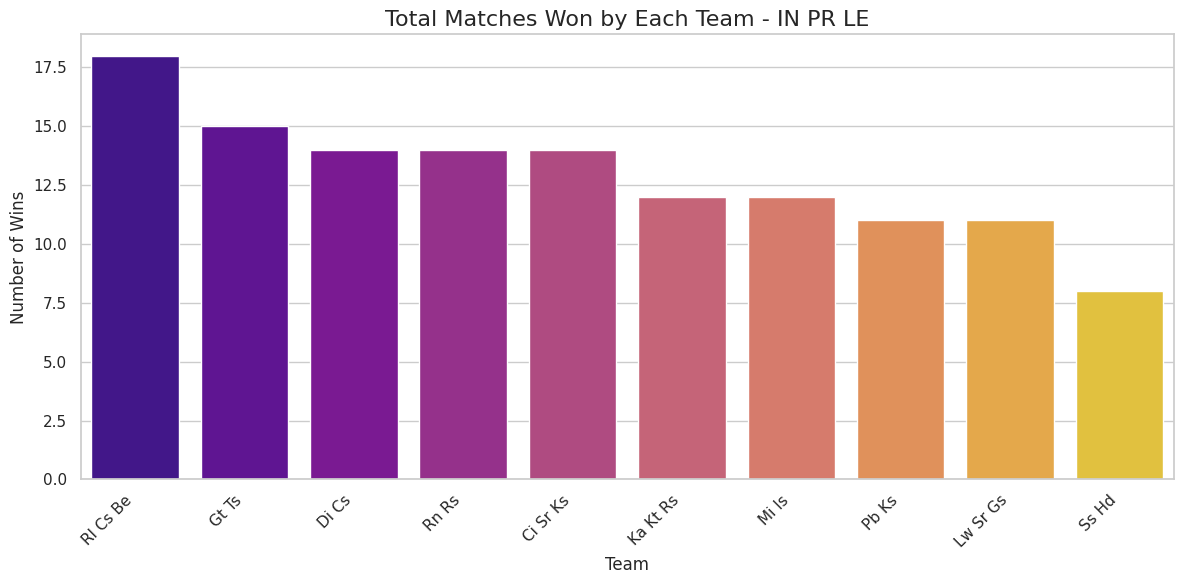

/tmp/ipython-input-42-2952512694.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='plasma')


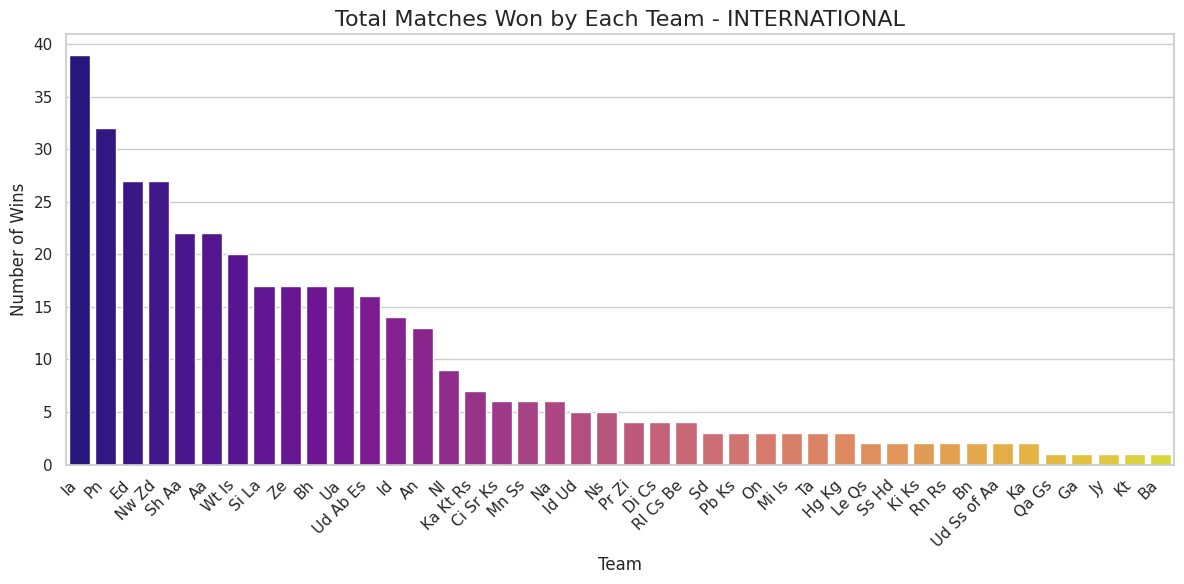

/tmp/ipython-input-42-2952512694.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='plasma')


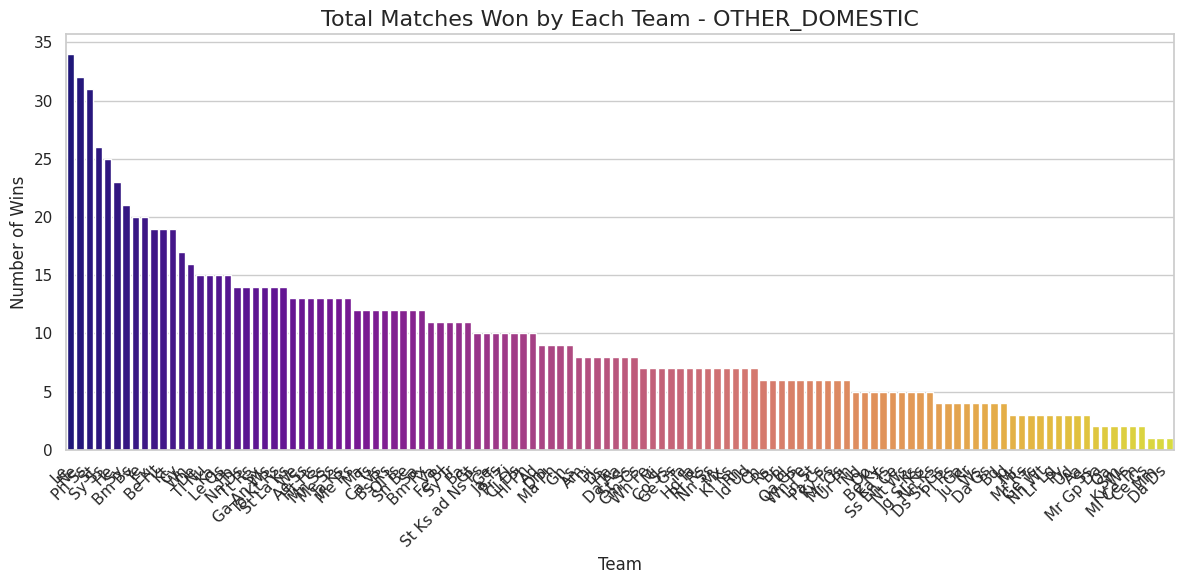

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure seaborn styling is set
sns.set(style="whitegrid")

# Load your cleaned dataset (if not already loaded)
# df_cleaned = pd.read_csv("your_file.csv")  # if needed

# Standardize the column to avoid issues
# df_cleaned['series_name'] = df_cleaned['series_name'].str.strip().str.lower()

# Mapping actual categories to make sure grouping is reliable
# (adjust this if your values differ like "Ipl T20", "international match", etc.)
conditions = [
    df_cleaned['series_type'].str.contains('In Pr Le'),
    df_cleaned['series_type'].str.contains('international'),
]
choices = ['In Pr Le', 'international']
df_cleaned['match_type'] = pd.Series(np.select(conditions, choices, default='other_domestic'))

# Grouped plots
for match_type in ['In Pr Le', 'international', 'other_domestic']:
    subset = df_cleaned[df_cleaned['match_type'] == match_type]
    winner_counts = subset['winner'].value_counts()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='plasma')
    plt.title(f'Total Matches Won by Each Team - {match_type.upper()}', fontsize=16)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Number of Wins', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<Figure size 1400x700 with 0 Axes>

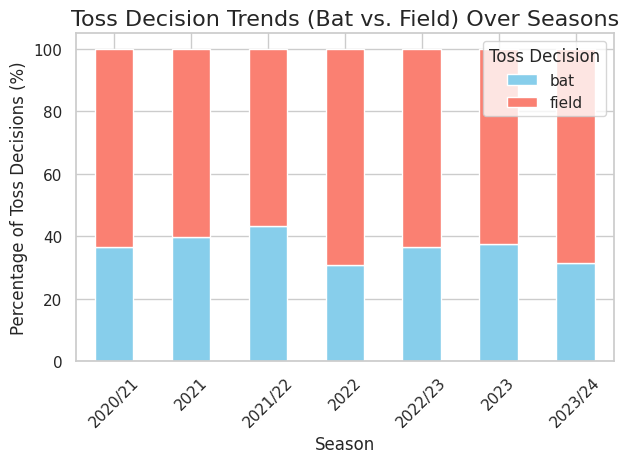

In [43]:
# Analyze toss decisions over the years
toss_decision_by_year = df_cleaned.groupby('season')['toss decision'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the trend
plt.figure(figsize=(14, 7))
toss_decision_by_year.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Toss Decision Trends (Bat vs. Field) Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percentage of Toss Decisions (%)', fontsize=12)
plt.legend(title='Toss Decision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Calculate the percentage of matches won by the toss winner
toss_winner_is_match_winner = df_cleaned['toss winner'] == df_cleaned['winner']
toss_win_match_win_percentage = (toss_winner_is_match_winner.sum() / len(df_cleaned)) * 100

print(f"Overall percentage of matches won by the team that won the toss: {toss_win_match_win_percentage:.2f}%")

Overall percentage of matches won by the team that won the toss: 49.70%


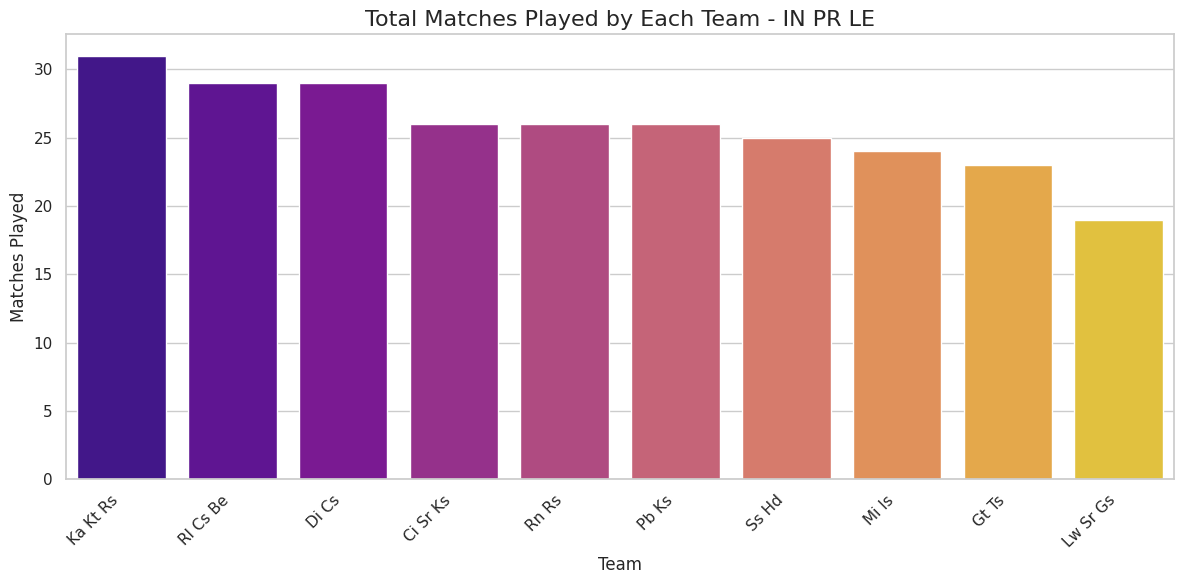

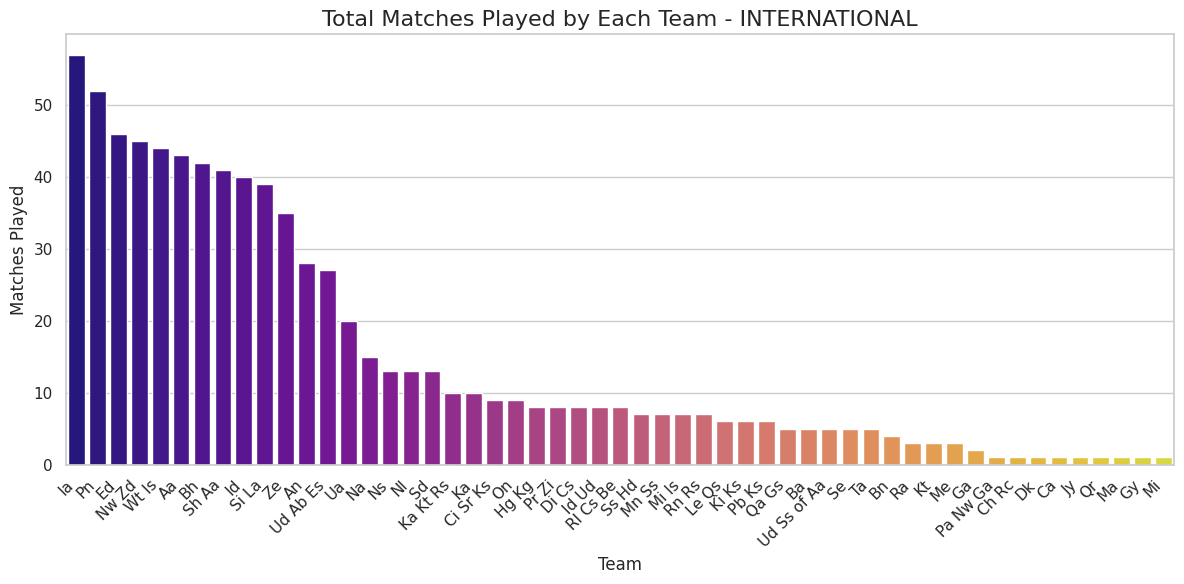

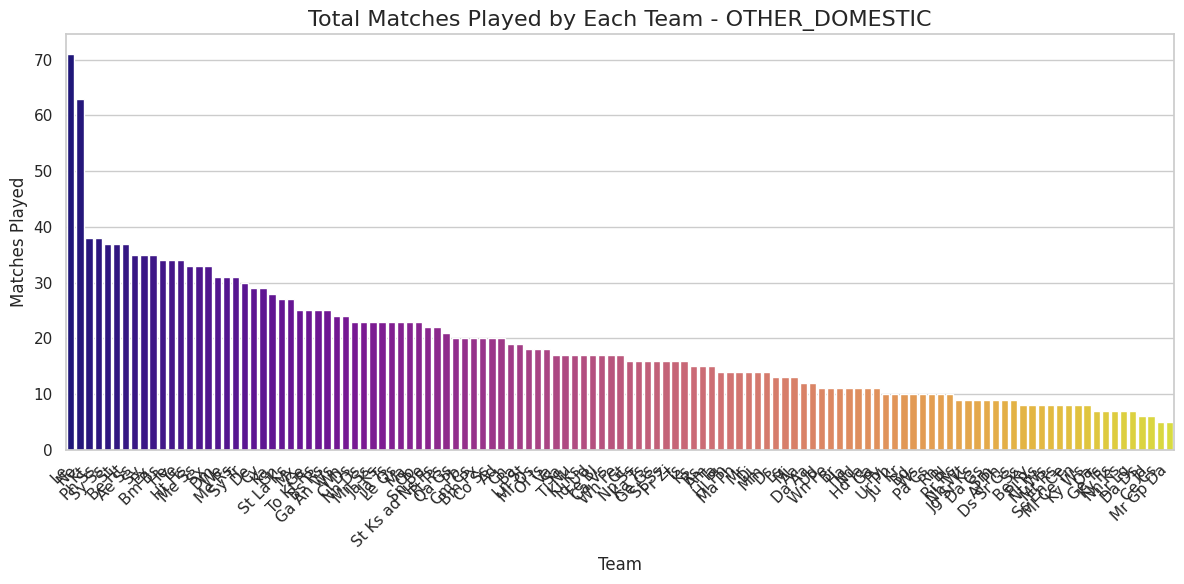

In [45]:
match_types = ['In Pr Le', 'international', 'other_domestic']

for match_type in match_types:
    subset = df_cleaned[df_cleaned['match_type'] == match_type]

    # Combine team1 and team2 columns into a single series
    teams_played = pd.concat([subset['team1'], subset['team2']])

    # Count matches per team
    match_counts = teams_played.value_counts()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=match_counts.index,
        y=match_counts.values,
        hue=match_counts.index,
        palette='plasma',
        legend=False
    )
    plt.title(f'Total Matches Played by Each Team - {match_type.upper()}', fontsize=16)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Matches Played', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [46]:
ipl_count = df_cleaned['series_type'].str.contains('In Pr Le', na=False).sum()
print(f"Number of IPL matches in given df: {ipl_count}")


Number of IPL matches in given df: 129


In [47]:
ipl_df = df_cleaned[df_cleaned['series_type'] == 'In Pr Le'].copy()
ipl_df.reset_index(drop=True, inplace=True)
ipl_df

,Unnamed: 0,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,match_type
0,208,8778419,Mi Is,Rl Cs Be,Rl Cs Be,wickets,2.0,Rl Cs Be,field,MA Cm Sm Ck Ci,...,160.0,8.0,126.0,30435,238727.0:2286472.0:3125562.0:5043310.0:4377610...,30393,5038018.0:1776627.0:5765934.0:2275195.0:314565...,In Pr Le,30393,In Pr Le
1,209,8778426,Ci Sr Ks,Di Cs,Di Cs,wickets,7.0,Di Cs,field,We Sm Mi,...,190.0,3.0,116.0,30414,7422673.0:313809.0:62432.0:233358.0:232000.0:1...,30421,7491189.0:197658.0:6521080.0:2275097.0:4690188...,In Pr Le,30421,In Pr Le
2,211,8778433,Ka Kt Rs,Ss Hd,Ka Kt Rs,runs,10.0,Ss Hd,field,MA Cm Sm Ck Ci,...,177.0,5.0,125.0,30400,4231702.0:7491224.0:3127354.0:1934099.0:172199...,36014,1958683.0:1539236.0:2034423.0:2082044.0:181404...,In Pr Le,30400,In Pr Le
3,212,8778440,Pb Ks,Rn Rs,Pb Ks,runs,4.0,Rn Rs,field,We Sm Mi,...,217.0,7.0,127.0,30407,2954769.0:2789079.0:363173.0:3479860.0:4230127...,30428,2178119.0:3730005.0:2981614.0:2162782.0:500117...,In Pr Le,30407,In Pr Le
4,214,8778447,Mi Is,Ka Kt Rs,Mi Is,runs,10.0,Ka Kt Rs,field,MA Cm Sm Ck Ci,...,142.0,7.0,122.0,30435,238727.0:2654014.0:3125562.0:5043310.0:4377610...,30400,4231702.0:7491224.0:3127354.0:172199.0:393014....,In Pr Le,30435,In Pr Le
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1667,9516751,Rl Cs Be,Rn Rs,Rl Cs Be,runs,112.0,Rl Cs Be,bat,Si Mh Sm Jr,...,59.0,10.0,65.0,30393,1776627.0:313809.0:2275195.0:5972868.0:210328....,30428,8058959.0:2162782.0:2981614.0:2125696.0:783319...,In Pr Le,30393,In Pr Le
125,1672,9516800,Ci Sr Ks,Di Cs,Ci Sr Ks,runs,77.0,Ci Sr Ks,bat,An Jy Sm Di,...,146.0,9.0,127.0,30414,7422673.0:2653993.0:5001170.0:196580.0:1642738...,30421,7491189.0:1539236.0:4685568.0:2231928.0:904749...,In Pr Le,30414,In Pr Le
126,1679,9128433,Mi Is,Ka Kt Rs,Ka Kt Rs,wickets,5.0,Ka Kt Rs,field,Ma Ct An Sm Pe,...,162.0,5.0,97.0,30435,238727.0:5043310.0:7494668.0:3125562.0:8191868...,30400,1945425.0:5959834.0:4497646.0:2083409.0:423170...,In Pr Le,30400,In Pr Le
127,1684,9128601,Pb Ks,Ci Sr Ks,Pb Ks,runs,11.0,Ci Sr Ks,field,We Sm Mi,...,176.0,6.0,126.0,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,In Pr Le,30407,In Pr Le


In [48]:
ipl_train_df = train_df[train_df['series_name'] == 'In Pr Le'].copy()
ipl_train_df.reset_index(drop=True, inplace=True)
ipl_train_df

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.00,189.000000
1,9516415,Mi Is,30435,238727.0:5043310.0:7537004.0:3125562.0:8191868...,Ci Sr Ks,30414,2653993.0:7422673.0:1945425.0:5001170.0:232000...,Ci Sr Ks,30414,Ci Sr Ks,...,2023-04-08,night match,In Pr Le,2023,5004,0.789474,1.000000,161.733333,33.33,164.466667
2,9592470,Mi Is,30435,5043310.0:238727.0:7537004.0:3125562.0:8191868...,Lw Sr Gs,48334,2436405.0:6698110.0:3299407.0:2275097.0:805890...,Mi Is,30435,Mi Is,...,2023-05-24,night match,In Pr Le,2023,2050,1.333333,1.975610,177.866667,0.00,159.107143
3,9128510,Ka Kt Rs,30400,5959834.0:37351.0:4497646.0:1613919.0:4231702....,Ss Hd,36014,7491294.0:1945355.0:3127354.0:4203499.0:423012...,Ss Hd,36014,Ss Hd,...,2022-04-15,night match,In Pr Le,2022,2764,1.714286,1.487805,148.866667,100.00,183.625000
4,9516632,Rl Cs Be,30393,1776627.0:313809.0:7861524.0:2275195.0:7586970...,Lw Sr Gs,48334,2436405.0:8058903.0:3299407.0:3479860.0:227509...,Rl Cs Be,30393,Rl Cs Be,...,2023-05-01,night match,In Pr Le,2023,23498,1.125000,1.487805,184.533333,100.00,146.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,9516751,Rl Cs Be,30393,1776627.0:313809.0:2275195.0:5972868.0:210328....,Rn Rs,30428,8058959.0:2162782.0:2981614.0:2125696.0:783319...,Rl Cs Be,30393,Rl Cs Be,...,2023-05-14,day/night match,In Pr Le,2023,4661,1.333333,0.506173,181.200000,66.67,142.500000
98,9516800,Ci Sr Ks,30414,7422673.0:2653993.0:5001170.0:196580.0:1642738...,Di Cs,30421,7491189.0:1539236.0:4685568.0:2231928.0:904749...,Ci Sr Ks,30414,Ci Sr Ks,...,2023-05-20,day/night match,In Pr Le,2023,2344,1.214286,1.000000,180.866667,50.00,156.600000
99,9128433,Mi Is,30435,238727.0:5043310.0:7494668.0:3125562.0:8191868...,Ka Kt Rs,30400,1945425.0:5959834.0:4497646.0:2083409.0:423170...,Ka Kt Rs,30400,Ka Kt Rs,...,2022-04-06,night match,In Pr Le,2022,18752,0.750000,1.000000,157.333333,50.00,171.750000
100,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,Pb Ks,30407,Ci Sr Ks,...,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,166.400000


In [49]:
ipl_test_df = test_df[test_df['series_name'] == 'In Pr Le'].copy()
ipl_test_df.reset_index(drop=True, inplace=True)
ipl_test_df

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,Rn Rs,bat,Be Sm Mi,...,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625000
1,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,Gt Ts,field,Ma Ct An Sm Pe,...,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125000
2,9516653,Pb Ks,30407,8127181.0:197658.0:4239038.0:2827327.0:5053082...,Mi Is,30435,238727.0:5043310.0:7537004.0:3125562.0:6249256...,Mi Is,field,Pb Ct An IS Ba Sm Mi Ch,...,2023-05-03,night match,In Pr Le,2023,7118,0.400000,0.672131,177.066667,50.00,184.500000
3,9516534,Ss Hd,36014,6381962.0:7491294.0:3127354.0:4203499.0:305731...,Ci Sr Ks,30414,7422673.0:2653993.0:1945425.0:232000.0:62432.0...,Ci Sr Ks,field,MA Cm Sm Ck Ci,...,2023-04-21,night match,In Pr Le,2023,2050,0.681818,0.344262,183.466667,25.00,156.350000
4,9516359,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Ss Hd,36014,7491294.0:2789079.0:3127354.0:6381962.0:503801...,Ss Hd,field,Rv Gi Il Sm Ul Hd,...,2023-04-02,day/night match,In Pr Le,2023,13880,1.727273,21.000000,171.066667,66.67,186.500000
5,9128363,Lw Sr Gs,48334,2954769.0:2654014.0:3023320.0:2034423.0:347986...,Gt Ts,48341,7491224.0:1611364.0:3339160.0:4377610.0:225245...,Gt Ts,field,We Sm Mi,...,2022-03-28,night match,In Pr Le,2022,5004,2.750000,1.000000,NaN,0.00,164.333333
6,9516674,Mi Is,30435,7537004.0:5043310.0:238727.0:8058924.0:3125562...,Ci Sr Ks,30414,7422673.0:2653993.0:1945425.0:232000.0:5001170...,Ci Sr Ks,field,MA Cm Sm Ck Ci,...,2023-05-06,day/night match,In Pr Le,2023,2050,0.700000,1.000000,167.000000,25.00,160.363636
7,9516338,Ci Sr Ks,30414,2653993.0:7422673.0:62432.0:2178119.0:232000.0...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:333916...,Gt Ts,field,Na Mi Sm Ad,...,2023-03-31,night match,In Pr Le,2023,5893,1.307692,0.506173,170.933333,0.00,154.733333
8,9516569,Di Cs,30421,1539236.0:4685568.0:1907163.0:4497688.0:203442...,Ss Hd,36014,6381962.0:2789079.0:3127354.0:7491294.0:420349...,Di Cs,bat,Rv Gi Il Sm Ul Hd,...,2023-04-24,night match,In Pr Le,2023,13880,0.812500,1.000000,174.866667,100.00,185.750000
9,9128356,Rl Cs Be,30393,313809.0:7861524.0:1776627.0:210328.0:6401800....,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:9047527...,Pb Ks,field,Dr DY Pl Ss Ay Mi,...,2022-03-27,night match,In Pr Le,2022,16540,1.000000,1.000000,159.933333,50.00,NaN


In [50]:
ipl_df.sort_values(by='match_dt', inplace=True, ignore_index=True)
ipl_df

,Unnamed: 0,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,match_type
0,208,8778419,Mi Is,Rl Cs Be,Rl Cs Be,wickets,2.0,Rl Cs Be,field,MA Cm Sm Ck Ci,...,160.0,8.0,126.0,30435,238727.0:2286472.0:3125562.0:5043310.0:4377610...,30393,5038018.0:1776627.0:5765934.0:2275195.0:314565...,In Pr Le,30393,In Pr Le
1,209,8778426,Ci Sr Ks,Di Cs,Di Cs,wickets,7.0,Di Cs,field,We Sm Mi,...,190.0,3.0,116.0,30414,7422673.0:313809.0:62432.0:233358.0:232000.0:1...,30421,7491189.0:197658.0:6521080.0:2275097.0:4690188...,In Pr Le,30421,In Pr Le
2,211,8778433,Ka Kt Rs,Ss Hd,Ka Kt Rs,runs,10.0,Ss Hd,field,MA Cm Sm Ck Ci,...,177.0,5.0,125.0,30400,4231702.0:7491224.0:3127354.0:1934099.0:172199...,36014,1958683.0:1539236.0:2034423.0:2082044.0:181404...,In Pr Le,30400,In Pr Le
3,212,8778440,Pb Ks,Rn Rs,Pb Ks,runs,4.0,Rn Rs,field,We Sm Mi,...,217.0,7.0,127.0,30407,2954769.0:2789079.0:363173.0:3479860.0:4230127...,30428,2178119.0:3730005.0:2981614.0:2162782.0:500117...,In Pr Le,30407,In Pr Le
4,214,8778447,Mi Is,Ka Kt Rs,Mi Is,runs,10.0,Ka Kt Rs,field,MA Cm Sm Ck Ci,...,142.0,7.0,122.0,30435,238727.0:2654014.0:3125562.0:5043310.0:4377610...,30400,4231702.0:7491224.0:3127354.0:172199.0:393014....,In Pr Le,30435,In Pr Le
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1672,9516800,Ci Sr Ks,Di Cs,Ci Sr Ks,runs,77.0,Ci Sr Ks,bat,An Jy Sm Di,...,146.0,9.0,127.0,30414,7422673.0:2653993.0:5001170.0:196580.0:1642738...,30421,7491189.0:1539236.0:4685568.0:2231928.0:904749...,In Pr Le,30414,In Pr Le
125,865,9516821,Rl Cs Be,Gt Ts,Gt Ts,wickets,6.0,Gt Ts,field,M Cy Sm Bu,...,198.0,4.0,123.0,30393,1776627.0:313809.0:2275195.0:5972868.0:2288789...,48341,1958683.0:7491224.0:3339160.0:3061225.0:225245...,In Pr Le,48341,In Pr Le
126,1529,9516814,Ss Hd,Mi Is,Mi Is,wickets,8.0,Mi Is,field,We Sm Mi,...,201.0,2.0,113.0,36014,8766603.0:2789079.0:3057312.0:5764576.0:420349...,30435,5043310.0:238727.0:7537004.0:3125562.0:6249256...,In Pr Le,30435,In Pr Le
127,839,9592463,Ci Sr Ks,Gt Ts,Ci Sr Ks,runs,15.0,Gt Ts,field,MA Cm Sm Ck Ci,...,157.0,10.0,132.0,30414,7422673.0:2653993.0:5001170.0:1945425.0:232000...,48341,1958683.0:7491224.0:4377610.0:3061225.0:225245...,In Pr Le,30414,In Pr Le


In [51]:
team1_win_p_last5 = []
team2_win_p_last5 = []
team1_venue_win_p = []
team2_venue_win_p = []
# --- Loop through each match in the dataframe ---
# We use iterrows() to go row-by-row, which is needed for this kind of historical calculation.
for i, row in ipl_df.iterrows():
    # Get the data for all matches that happened BEFORE the current one
    past_matches = ipl_df.iloc[:i]

    # --- 1. Calculate Recent Form (Win % in last 5 games) ---

    # For Team 1
    team1_past = past_matches[(past_matches['team1'] == row['team1']) | (past_matches['team2'] == row['team1'])].tail(5)
    if len(team1_past) < 5:
        # Not enough past matches, so we add a placeholder (NaN)
        team1_win_p_last5.append(np.nan)
    else:
        wins = (team1_past['winner'] == row['team1']).sum()
        win_percentage = wins / 5
        team1_win_p_last5.append(win_percentage)

    # For Team 2
    team2_past = past_matches[(past_matches['team1'] == row['team2']) | (past_matches['team2'] == row['team2'])].tail(5)
    if len(team2_past) < 5:
        # Not enough past matches, so we add a placeholder (NaN)
        team2_win_p_last5.append(np.nan)
    else:
        wins = (team2_past['winner'] == row['team2']).sum()
        win_percentage = wins / 5
        team2_win_p_last5.append(win_percentage)


    # --- 2. Calculate Venue Performance ---

    # For Team 1 at the current venue
    team1_venue_matches = past_matches[
        ((past_matches['team1'] == row['team1']) | (past_matches['team2'] == row['team1'])) &
        (past_matches['venue'] == row['venue'])
    ]
    if len(team1_venue_matches) == 0:
        team1_venue_win_p.append(np.nan)
    else:
        wins = (team1_venue_matches['winner'] == row['team1']).sum()
        win_percentage = wins / len(team1_venue_matches)
        team1_venue_win_p.append(win_percentage)

    # For Team 2 at the current venue
    team2_venue_matches = past_matches[
        ((past_matches['team1'] == row['team2']) | (past_matches['team2'] == row['team2'])) &
        (past_matches['venue'] == row['venue'])
    ]
    if len(team2_venue_matches) == 0:
        team2_venue_win_p.append(np.nan)
    else:
        wins = (team2_venue_matches['winner'] == row['team2']).sum()
        win_percentage = wins / len(team2_venue_matches)
        team2_venue_win_p.append(win_percentage)


# --- 3. Add the new features as columns to the dataframe ---
ipl_df['team1_win_percentage_last5'] = team1_win_p_last5
ipl_df['team2_win_percentage_last5'] = team2_win_p_last5
ipl_df['team1_venue_win_percentage'] = team1_venue_win_p
ipl_df['team2_venue_win_percentage'] = team2_venue_win_p


# --- 4. Handle Missing Values (NaNs) ---
# As discussed, we fill the NaN values with a neutral 50% win rate.
ipl_df.fillna(0.5, inplace=True)


# --- 5. Verify the result ---
print("Successfully engineered 4 new features.")
print("Displaying the first 10 rows with the new feature columns:")

# We'll display all relevant columns to see the result
display_cols = [
    'team1', 'team2', 'venue',
    'team1_win_percentage_last5', 'team2_win_percentage_last5',
    'team1_venue_win_percentage', 'team2_venue_win_percentage',
    'winner'
]
ipl_df[display_cols].head(10)

Successfully engineered 4 new features.
Displaying the first 10 rows with the new feature columns:


,team1,team2,venue,team1_win_percentage_last5,team2_win_percentage_last5,team1_venue_win_percentage,team2_venue_win_percentage,winner
0,Mi Is,Rl Cs Be,MA Cm Sm Ck Ci,0.5,0.5,0.5,0.5,Rl Cs Be
1,Ci Sr Ks,Di Cs,We Sm Mi,0.5,0.5,0.5,0.5,Di Cs
2,Ka Kt Rs,Ss Hd,MA Cm Sm Ck Ci,0.5,0.5,0.5,0.5,Ka Kt Rs
3,Pb Ks,Rn Rs,We Sm Mi,0.5,0.5,0.5,0.5,Pb Ks
4,Mi Is,Ka Kt Rs,MA Cm Sm Ck Ci,0.5,0.5,0.0,1.0,Mi Is
5,Rl Cs Be,Ss Hd,MA Cm Sm Ck Ci,0.5,0.5,1.0,0.0,Rl Cs Be
6,Di Cs,Rn Rs,We Sm Mi,0.5,0.5,1.0,0.0,Rn Rs
7,Pb Ks,Ci Sr Ks,We Sm Mi,0.5,0.5,1.0,0.0,Ci Sr Ks
8,Mi Is,Ss Hd,MA Cm Sm Ck Ci,0.5,0.5,0.5,0.0,Mi Is
9,Rl Cs Be,Ka Kt Rs,MA Cm Sm Ck Ci,0.5,0.5,1.0,0.5,Rl Cs Be


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'ipl_df' is your dataframe with the 4 engineered features already added.

# --- 1. Final Feature Selection ---
# Select the categorical and numerical features we will use for prediction.
features = [
    'team1', 'team2', 'venue', 'toss winner', 'toss decision',
    'team1_win_percentage_last5', 'team2_win_percentage_last5',
    'team1_venue_win_percentage', 'team2_venue_win_percentage'
]
target = 'winner'

X = ipl_df[features]
y = ipl_df[target]

# --- 2. Preprocessing ---
# One-Hot Encode the categorical features. This converts them into a numerical format.
# The numerical features (win percentages) are kept as they are.
X_encoded = pd.get_dummies(X, columns=['team1', 'team2', 'venue', 'toss winner', 'toss decision'], drop_first=True)

# Encode the target variable (y) into numbers (e.g., 'Mumbai Indians' -> 5)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 3. Train-Test Split ---
# Split the data: 80% for training, 20% for testing.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} matches")
print(f"Testing set size: {X_test.shape[0]} matches")
print("-" * 30)

# --- 4. Train the Decision Tree Model ---
# We initialize the model with a random_state for reproducibility.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Model trained successfully.")
print("-" * 30)

# --- 5. Evaluate the Model ---
# Make predictions on the unseen test data.
y_pred = dt_model.predict(X_test)

# Calculate the accuracy.
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")
print("-" * 30)

# Display a detailed classification report.
# We use the label encoder to show team names instead of numbers.
# `zero_division=0` prevents warnings if a team in the test set was never predicted.
report = classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0)
print("Classification Report:\n")
print(report)



Training set size: 103 matches
Testing set size: 26 matches
------------------------------
Decision Tree Model trained successfully.
------------------------------
Model Accuracy on Test Set: 0.50
------------------------------
Classification Report:

              precision    recall  f1-score   support

    Ci Sr Ks       0.25      0.20      0.22         5
       Di Cs       0.00      0.00      0.00         2
       Gt Ts       1.00      0.67      0.80         3
    Ka Kt Rs       0.00      0.00      0.00         1
    Lw Sr Gs       0.75      1.00      0.86         3
       Mi Is       1.00      0.33      0.50         3
       Pb Ks       0.00      0.00      0.00         2
    Rl Cs Be       1.00      0.83      0.91         6
       Rn Rs       1.00      1.00      1.00         1
       Ss Hd       0.00      0.00      0.00         0

    accuracy                           0.50        26
   macro avg       0.50      0.40      0.43        26
weighted avg       0.63      0.50      0.54 

In [53]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# We assume X_train, X_test, y_train, y_test are already created from the previous step.

# --- 1. Define the Model and Parameter Grid ---
# We create a new Decision Tree instance.
dt_model = DecisionTreeClassifier(random_state=42)

# We define the range of 'max_depth' values we want to test.
param_grid = {
    'max_depth': range(3, 16) # Tests depths from 3 to 15
}

# --- 2. Set up GridSearchCV ---
# cv=5 means 5-fold cross-validation.
# scoring='accuracy' tells it to find the model with the highest accuracy.
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1 # This will print progress updates
)

# --- 3. Run the Grid Search ---
# This process is done ONLY on the training data.
print("Starting Grid Search... (This may take a moment)")
grid_search.fit(X_train, y_train)

# --- 4. Display the Results ---
print("\nGrid Search Complete.")
print("-" * 30)

# Print the best hyperparameter found
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")

# Print the best cross-validation accuracy score
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# The 'grid_search' object now contains the best version of the model.
# You can use it directly for predictions.
best_dt_model = grid_search.best_estimator_



Starting Grid Search... (This may take a moment)
Fitting 5 folds for each of 13 candidates, totalling 65 fits

Grid Search Complete.
------------------------------
Best max_depth: 15
Best Cross-Validation Accuracy: 0.48


In [54]:
from sklearn.metrics import accuracy_score, classification_report

# We assume 'grid_search' is the fitted GridSearchCV object from the previous step,
# 'X_test' and 'y_test' are our holdout testing data,
# and 'le' is our fitted LabelEncoder for the team names.

# --- 1. Get the Best Model ---
# The best model found by GridSearchCV is stored in the .best_estimator_ attribute
best_dt_model = grid_search.best_estimator_

print("Evaluating the tuned Decision Tree model...")
print(f"Model using optimal max_depth: {best_dt_model.max_depth}")
print("-" * 30)

# --- 2. Make Predictions on the Test Set ---
# Use the tuned model to predict the outcomes for the unseen test data.
y_pred_tuned = best_dt_model.predict(X_test)

# --- 3. Evaluate the Tuned Model's Performance ---
# Calculate the new accuracy score.
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy on Test Set: {accuracy_tuned:.2f}")
print("-" * 30)

# Display the detailed classification report for the tuned model.
report_tuned = classification_report(y_test, y_pred_tuned, target_names=le.classes_, zero_division=0)
print("Tuned Model Classification Report:\n")
print(report_tuned)



Evaluating the tuned Decision Tree model...
Model using optimal max_depth: 15
------------------------------
Tuned Model Accuracy on Test Set: 0.46
------------------------------
Tuned Model Classification Report:

              precision    recall  f1-score   support

    Ci Sr Ks       0.40      0.40      0.40         5
       Di Cs       0.00      0.00      0.00         2
       Gt Ts       1.00      0.67      0.80         3
    Ka Kt Rs       0.00      0.00      0.00         1
    Lw Sr Gs       1.00      1.00      1.00         3
       Mi Is       1.00      0.33      0.50         3
       Pb Ks       0.00      0.00      0.00         2
    Rl Cs Be       1.00      0.50      0.67         6
       Rn Rs       0.33      1.00      0.50         1
       Ss Hd       0.00      0.00      0.00         0

    accuracy                           0.46        26
   macro avg       0.47      0.39      0.39        26
weighted avg       0.67      0.46      0.52        26



In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# We assume X_encoded, y_encoded, X_train, X_test, y_train, y_test, and le
# are all available from the previous steps.

# --- 1. Train the Random Forest Model ---
# n_estimators=100 means we will build 100 decision trees.
# random_state=42 ensures the results are reproducible.
rf_model = RandomForestClassifier(n_estimators=10000, random_state=42)

print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the Random Forest Model ---
# Make predictions on the unseen test data.
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy on Test Set: {accuracy_rf:.2f}")
print("-" * 30)


# --- 3. Display the Classification Report ---
# Display a detailed report to see how it performs on each team.
report_rf = classification_report(y_test, y_pred_rf, target_names=le.classes_, zero_division=0)
print("Random Forest Classification Report:\n")
print(report_rf)



Training the Random Forest model...
Model trained successfully.
------------------------------
Random Forest Model Accuracy on Test Set: 0.58
------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

    Ci Sr Ks       1.00      0.20      0.33         5
       Di Cs       0.33      0.50      0.40         2
       Gt Ts       1.00      0.33      0.50         3
    Ka Kt Rs       0.33      1.00      0.50         1
    Lw Sr Gs       0.67      0.67      0.67         3
       Mi Is       1.00      0.33      0.50         3
       Pb Ks       0.50      0.50      0.50         2
    Rl Cs Be       1.00      1.00      1.00         6
       Rn Rs       0.25      1.00      0.40         1
       Ss Hd       0.00      0.00      0.00         0

    accuracy                           0.58        26
   macro avg       0.61      0.55      0.48        26
weighted avg       0.82      0.58      0.59        26



In [56]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Note: If you don't have XGBoost installed, you may need to run:
# !pip install xgboost

# We assume X_train, X_test, y_train, y_test, and le
# are all available from the previous steps.

# --- 1. Train the XGBoost Model ---
# We initialize the XGBClassifier.
# `use_label_encoder=False` and `eval_metric='mlogloss'` are often recommended
# to align with modern XGBoost versions.
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the XGBoost Model ---
# Make predictions on the unseen test data.
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy.
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy on Test Set: {accuracy_xgb:.2f}")
print("-" * 30)


# --- 3. Display the Classification Report ---
# Display a detailed report to see how it performs on each team.
report_xgb = classification_report(y_test, y_pred_xgb, target_names=le.classes_, zero_division=0)
print("XGBoost Classification Report:\n")
print(report_xgb)



Training the XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:59:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model trained successfully.
------------------------------
XGBoost Model Accuracy on Test Set: 0.54
------------------------------
XGBoost Classification Report:

              precision    recall  f1-score   support

    Ci Sr Ks       0.50      0.20      0.29         5
       Di Cs       0.00      0.00      0.00         2
       Gt Ts       1.00      0.67      0.80         3
    Ka Kt Rs       1.00      1.00      1.00         1
    Lw Sr Gs       0.50      0.33      0.40         3
       Mi Is       0.50      0.33      0.40         3
       Pb Ks       0.50      1.00      0.67         2
    Rl Cs Be       1.00      0.83      0.91         6
       Rn Rs       0.25      1.00      0.40         1
       Ss Hd       0.00      0.00      0.00         0

    accuracy                           0.54        26
   macro avg       0.53      0.54      0.49        26
weighted avg       0.64      0.54      0.55        26



In [57]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# --- Pre-computation Step ---
# This section prepares the dataframes for the feature engineering functions.
# We assume 'cleaned_df', 'batsman_df', and 'bowler_df' are already loaded.

# For progress bars
tqdm.pandas()
cleaned_df = df_cleaned.copy()
# Ensure dataframes are sorted by date. This is CRITICAL for historical calculations.
try:
    cleaned_df['match_dt'] = pd.to_datetime(cleaned_df['match_dt'])
    cleaned_df.sort_values(by='match_dt', inplace=True, ignore_index=True)

    batsman_df['match_dt'] = pd.to_datetime(batsman_df['match_dt'])
    batsman_df.sort_values(by='match_dt', inplace=True)

    bowler_df['match_dt'] = pd.to_datetime(bowler_df['match_dt'])
    bowler_df.sort_values(by='match_dt', inplace=True)
    print("Dataframes sorted by date successfully.")
except Exception as e:
    print(f"Error sorting dataframes: {e}. Please ensure 'match_dt' column exists and is in a date format.")


# --- Helper Functions for Feature Engineering ---

def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl_df):
    """
    Function to get last n games stats of a player before a specified date.
    """
    if bat_or_bowl_df is batsman_df:
        id_col = 'batsman_id'
    else:
        id_col = 'bowler_id'

    # Filter for the player's past matches
    player_matches = bat_or_bowl_df[(bat_or_bowl_df['match_dt'] < date) & (bat_or_bowl_df[id_col] == float(player_id))]
    return player_matches.tail(n)


def winpLastn(team_id, date, n, match_df):
    """
    Calculates a team's win percentage in their last n games.
    """
    df_rel = match_df[(match_df['match_dt'] < date) & ((match_df['team1_id'] == team_id) | (match_df['team2_id'] == team_id))].tail(n)
    if df_rel.shape[0] == 0:
        return 0
    win_count = df_rel[df_rel['winner_id'] == team_id].shape[0]
    return round(win_count * 100 / df_rel.shape[0], 2)


def winpCrossLastn(team1_id, team2_id, date, n, match_df):
    """
    Calculates Team 1's win percentage against Team 2 in their last n encounters.
    """
    df_rel = match_df[(match_df['match_dt'] < date) &
                      (((match_df['team1_id'] == team1_id) & (match_df['team2_id'] == team2_id)) |
                       ((match_df['team1_id'] == team2_id) & (match_df['team2_id'] == team1_id)))].tail(n)
    if df_rel.shape[0] == 0:
        return 0
    win_count = df_rel[df_rel['winner_id'] == team1_id].shape[0]
    return round(win_count * 100 / df_rel.shape[0], 2)


def calculate_top3_player_metric(player_list, date, n, df, metric_col, sort_ascending=False):
    """
    A generic function to calculate metrics for the top 3 players based on a given column.
    """
    player_list = str(player_list).split(':')
    player_metrics = []

    id_col = 'batsman_id' if df is batsman_df else 'bowler_id'

    for player in player_list:
        if player == 'nan': continue
        df_rel = giveLastNgamesPlayer(player, date, n, df)
        # Calculate the mean of the metric over the last n games for this player
        metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
        if not np.isnan(metric_avg):
            player_metrics.append(metric_avg)

    player_metrics.sort(reverse=not sort_ascending)
    top_3_metrics = player_metrics[:3]

    # Return the sum for runs/wickets, and average for rates
    if metric_col in ['runs', 'wicket_count', 'runs_scored_30']:
        return np.nansum(top_3_metrics)
    else:
        return np.nanmean(top_3_metrics) if top_3_metrics else 0


# --- Main Feature Creation ---

# Create a copy to avoid modifying the original dataframe
model_df = cleaned_df.copy()

# 1. Target Variable
model_df['target'] = (model_df['winner_id'] == model_df['team1_id']).astype(int)

# 2. Match Context Features
model_df['toss_winner'] = (model_df['toss winner'] == model_df['team1']).astype(int)
model_df['toss_decision'] = (model_df['toss decision'] == 'bat').astype(int)

# 3. Team Form & Head-to-Head
print("Calculating team form and head-to-head features...")
team1_winp = model_df.progress_apply(lambda x: winpLastn(x['team1_id'], x['match_dt'], 5, model_df), axis=1)
team2_winp = model_df.progress_apply(lambda x: winpLastn(x['team2_id'], x['match_dt'], 5, model_df), axis=1)
model_df['team_winp_last5_ratio'] = (team1_winp + 1) / (team2_winp + 1)

model_df['team1_winp_team2_last5'] = model_df.progress_apply(lambda x: winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5, model_df), axis=1)

# 4. Player Performance Ratios
print("Calculating player performance ratio features (this will take the most time)...")
# Prepare batsman_df for 30+ scores calculation
batsman_df['runs_scored_30'] = (batsman_df['runs'] >= 30).astype(int)

# Runs Ratio
t1_runs = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'runs'), axis=1)
t2_runs = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'runs'), axis=1)
model_df['runsratio_top3'] = (t1_runs + 1) / (t2_runs + 1)

# Wickets Ratio
t1_wkts = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, bowler_df, 'wicket_count'), axis=1)
t2_wkts = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, bowler_df, 'wicket_count'), axis=1)
model_df['wicketsratio_top3'] = (t1_wkts + 1) / (t2_wkts + 1)

# Strike Rate Ratio
t1_sr = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'strike_rate'), axis=1)
t2_sr = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'strike_rate'), axis=1)
model_df['strike_rate_ratio_top3'] = (t1_sr + 1) / (t2_sr + 1)

# Economy Ratio
t1_econ = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, bowler_df, 'economy', sort_ascending=True), axis=1)
t2_econ = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, bowler_df, 'economy', sort_ascending=True), axis=1)
model_df['economy_ratio_top3'] = (t1_econ + 1) / (t2_econ + 1)

# 30+ Scores Ratio
t1_30s = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'runs_scored_30'), axis=1)
t2_30s = model_df.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'runs_scored_30'), axis=1)
model_df['team_count_30runs_ratio'] = (t1_30s + 1) / (t2_30s + 1)


# --- Final Cleanup ---
final_features = [
    'toss_winner',
    'toss_decision',
    'team_winp_last5_ratio',
    'team1_winp_team2_last5',
    'runsratio_top3',
    'wicketsratio_top3',
    'strike_rate_ratio_top3',
    'economy_ratio_top3',
    'team_count_30runs_ratio',
    'target' # Keep target for splitting later
]

final_model_df = model_df[final_features].copy()
final_model_df.fillna(1.0, inplace=True) # Fill any remaining NaNs with a neutral 1.0 for ratios

print("\n--- Feature Engineering Complete ---")
print("Final dataframe shape:", final_model_df.shape)
print("\nFirst 5 rows of the final modeling dataframe:")
print(final_model_df.head())



Dataframes sorted by date successfully.
Calculating team form and head-to-head features...


100%|██████████| 1662/1662 [00:01<00:00, 1043.08it/s]


Calculating player performance ratio features (this will take the most time)...


 80%|███████▉  | 1328/1662 [00:09<00:02, 146.63it/s]/tmp/ipython-input-57-971030317.py:80: RuntimeWarning: Mean of empty slice
  metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
 79%|███████▉  | 1319/1662 [00:09<00:02, 147.51it/s]/tmp/ipython-input-57-971030317.py:80: RuntimeWarning: Mean of empty slice
  metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
100%|██████████| 1662/1662 [00:11<00:00, 148.12it/s]


--- Feature Engineering Complete ---
Final dataframe shape: (1662, 10)

First 5 rows of the final modeling dataframe:
   toss_winner  toss_decision  team_winp_last5_ratio  team1_winp_team2_last5  \
0            0              0                    1.0                     0.0   
1            1              1                    1.0                     0.0   
2            0              0                    1.0                     0.0   
3            0              0                    1.0                     0.0   
4            0              0                    1.0                     0.0   

   runsratio_top3  wicketsratio_top3  strike_rate_ratio_top3  \
0             1.0                1.0                1.000000   
1             1.0                1.0                1.000000   
2            94.0                2.0              146.596667   
3             1.0                1.0                1.000000   
4             1.0                1.0                1.000000   

   economy_rati

In [58]:
final_model_df.head()

,toss_winner,toss_decision,team_winp_last5_ratio,team1_winp_team2_last5,runsratio_top3,wicketsratio_top3,strike_rate_ratio_top3,economy_ratio_top3,team_count_30runs_ratio,target
0,0,0,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0
1,1,1,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0
2,0,0,1.0,0.0,94.0,2.0,146.596667,1.0,2.0,0
3,0,0,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1
4,0,0,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# We assume 'final_model_df' is the fully engineered dataframe from the previous step.

# --- 1. Separate Features (X) and Target (y) ---
# The 'target' column is our y, everything else is our X.
try:
    X = final_model_df.drop('target', axis=1)
    y = final_model_df['target']
    print("Features (X) and Target (y) separated successfully.")
except KeyError:
    print("Error: 'target' column not found. Please ensure the feature engineering step was completed.")
except NameError:
    print("Error: 'final_model_df' does not exist. Please run the previous cell first.")


# --- 2. Create Train/Test Sets ---
# We split the data into 80% for training and 20% for testing.
# random_state=42 ensures that we get the same split every time, which is good for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} matches")
print(f"Testing set size: {X_test.shape[0]} matches")
print("-" * 30)

# --- 3. Train the Decision Tree Model ---
# Initialize the model. random_state ensures the same result each time.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

print("Decision Tree Model trained successfully.")
print("-" * 30)

# --- 4. Evaluate the Model ---
# Make predictions on the unseen test data
y_pred = dt_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}") # Using 4 decimal places for more precision
print("-" * 30)

# Display a detailed classification report
# Target names correspond to 0 (Team2 Wins) and 1 (Team1 Wins)
report = classification_report(y_test, y_pred, target_names=['Team2 Wins', 'Team1 Wins'])
print("Classification Report:\n")
print(report)



Features (X) and Target (y) separated successfully.
Training set size: 1329 matches
Testing set size: 333 matches
------------------------------
Decision Tree Model trained successfully.
------------------------------
Model Accuracy on Test Set: 0.5465
------------------------------
Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.53      0.57      0.55       162
  Team1 Wins       0.56      0.53      0.54       171

    accuracy                           0.55       333
   macro avg       0.55      0.55      0.55       333
weighted avg       0.55      0.55      0.55       333



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# We assume X_train, X_test, y_train, and y_test are already created
# from the previous Decision Tree step.

# --- 1. Train the Random Forest Model ---
# n_estimators=100 means the model will build 100 individual decision trees.
# random_state=42 ensures the results are reproducible.
# n_jobs=-1 will use all available CPU cores to speed up training.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the Random Forest Model ---
# Make predictions on the unseen test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy on Test Set: {accuracy_rf:.4f}")
print("-" * 30)


# --- 3. Display the Classification Report ---
# This report gives a more detailed breakdown of performance.
report_rf = classification_report(y_test, y_pred_rf, target_names=['Team2 Wins', 'Team1 Wins'])
print("Random Forest Classification Report:\n")
print(report_rf)



Training the Random Forest model...
Model trained successfully.
------------------------------
Random Forest Model Accuracy on Test Set: 0.5165
------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.50      0.53      0.52       162
  Team1 Wins       0.53      0.50      0.52       171

    accuracy                           0.52       333
   macro avg       0.52      0.52      0.52       333
weighted avg       0.52      0.52      0.52       333



In [61]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Note: If you don't have XGBoost installed, you may need to run:
# !pip install xgboost

# We assume X_train, X_test, y_train, and y_test are already created
# from the previous steps.

# --- 1. Train the XGBoost Model ---
# Initialize the XGBClassifier.
# use_label_encoder=False and eval_metric='logloss' are recommended
# to align with modern XGBoost versions and for binary classification.
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the XGBoost Model ---
# Make predictions on the unseen test data.
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy score.
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy on Test Set: {accuracy_xgb:.4f}")
print("-" * 30)


# --- 3. Display the Classification Report ---
# This provides a detailed breakdown of the model's performance.
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Team2 Wins', 'Team1 Wins'])
print("XGBoost Classification Report:\n")
print(report_xgb)



Training the XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:01:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model trained successfully.
------------------------------
XGBoost Model Accuracy on Test Set: 0.5015
------------------------------
XGBoost Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.49      0.52      0.50       162
  Team1 Wins       0.52      0.49      0.50       171

    accuracy                           0.50       333
   macro avg       0.50      0.50      0.50       333
weighted avg       0.50      0.50      0.50       333



In [62]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Note: If you don't have XGBoost installed, you may need to run:
# !pip install xgboost

# We assume X_train, X_test, y_train, and y_test are already created.

# --- 1. Define the Model and Parameter Grid for Tuning ---
# Initialize the XGBClassifier without the deprecated parameter.
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define a grid of key hyperparameters to test.
# This grid is kept small to ensure it runs relatively quickly.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

# --- 2. Set up and Run GridSearchCV ---
# This will test combinations of the parameters using 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3, # Using 3 folds for speed, 5 is also common
    verbose=1,
    n_jobs=-1
)

print("Starting Hyperparameter Tuning with GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nTuning Complete.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print("-" * 30)

# --- 3. Evaluate the BEST Model ---
# The grid_search object now holds the best version of the model found.
best_xgb_model = grid_search.best_estimator_

# Make predictions on the unseen test data using the tuned model.
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Calculate the accuracy score of the tuned model.
accuracy_tuned_xgb = accuracy_score(y_test, y_pred_tuned_xgb)
print(f"Tuned XGBoost Model Accuracy on Test Set: {accuracy_tuned_xgb:.4f}")
print("-" * 30)

# --- 4. Display the Classification Report ---
report_tuned_xgb = classification_report(y_test, y_pred_tuned_xgb, target_names=['Team2 Wins', 'Team1 Wins'])
print("Tuned XGBoost Classification Report:\n")
print(report_tuned_xgb)


Starting Hyperparameter Tuning with GridSearchCV...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuning Complete.
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best cross-validation accuracy: 0.5530
------------------------------
Tuned XGBoost Model Accuracy on Test Set: 0.5435
------------------------------
Tuned XGBoost Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.53      0.58      0.55       162
  Team1 Wins       0.56      0.51      0.53       171

    accuracy                           0.54       333
   macro avg       0.54      0.54      0.54       333
weighted avg       0.55      0.54      0.54       333



In [63]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Note: If you don't have LightGBM installed, you may need to run:
# !pip install lightgbm

# We assume X_train, X_test, y_train, and y_test are already created
# from the previous steps.

# --- 1. Train the LightGBM Model ---
# Initialize the LGBMClassifier.
lgbm_model = lgb.LGBMClassifier(random_state=42)

print("Training the LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the LightGBM Model ---
# Make predictions on the unseen test data.
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate the accuracy score.
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Model Accuracy on Test Set: {accuracy_lgbm:.4f}")
print("-" * 30)


# --- 3. Display the Classification Report ---
# This provides a detailed breakdown of the model's performance.
report_lgbm = classification_report(y_test, y_pred_lgbm, target_names=['Team2 Wins', 'Team1 Wins'])
print("LightGBM Classification Report:\n")
print(report_lgbm)



Training the LightGBM model...
[LightGBM] [Info] Number of positive: 650, number of negative: 679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 1329, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489090 -> initscore=-0.043649
[LightGBM] [Info] Start training from score -0.043649
Model trained successfully.
------------------------------
LightGBM Model Accuracy on Test Set: 0.4865
------------------------------
LightGBM Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.47      0.49      0.48       162
  Team1 Wins       0.50      0.49      0.49       171

    accuracy                           0.49       333
   macro avg       0.49      0.4

In [64]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Note: If you don't have LightGBM installed, you may need to run:
# !pip install lightgbm

# We assume X_train, X_test, y_train, and y_test are already created.

# --- 1. Define the Model and Parameter Grid for Tuning ---
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Define a grid of key hyperparameters to test.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, -1], # -1 means no limit
    'learning_rate': [0.05, 0.1],
    'num_leaves': [20, 31, 40] # Controls the complexity of the tree
}

# --- 2. Set up and Run GridSearchCV ---
# This will test combinations of the parameters using 3-fold cross-validation.
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

print("Starting LightGBM Hyperparameter Tuning with GridSearchCV...")
grid_search_lgbm.fit(X_train, y_train)

print("\nTuning Complete.")
print(f"Best parameters found: {grid_search_lgbm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_lgbm.best_score_:.4f}")
print("-" * 30)

# --- 3. Evaluate the BEST LightGBM Model ---
best_lgbm_model = grid_search_lgbm.best_estimator_

# Make predictions on the unseen test data using the tuned model.
y_pred_tuned_lgbm = best_lgbm_model.predict(X_test)

# Calculate the accuracy score of the tuned model.
accuracy_tuned_lgbm = accuracy_score(y_test, y_pred_tuned_lgbm)
print(f"Tuned LightGBM Model Accuracy on Test Set: {accuracy_tuned_lgbm:.4f}")
print("-" * 30)

# --- 4. Display the Classification Report ---
report_tuned_lgbm = classification_report(y_test, y_pred_tuned_lgbm, target_names=['Team2 Wins', 'Team1 Wins'])
print("Tuned LightGBM Classification Report:\n")
print(report_tuned_lgbm)


Starting LightGBM Hyperparameter Tuning with GridSearchCV...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Number of positive: 650, number of negative: 679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 1329, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489090 -> initscore=-0.043649
[LightGBM] [Info] Start training from score -0.043649

Tuning Complete.
Best parameters found: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 50, 'num_leaves': 31}
Best cross-validation accuracy: 0.5357
------------------------------
Tuned LightGBM Model Accuracy on Test Set: 0.5075
------------------------------
Tuned LightGBM Classification Report:

              p

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# We assume X_train, X_test, y_train, and y_test are already created.

# --- 1. Define the Model and Parameter Grid for Tuning ---
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define a grid of key hyperparameters to test.
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# --- 2. Set up and Run GridSearchCV ---
# This will test combinations of the parameters using 3-fold cross-validation.
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

print("Starting Random Forest Hyperparameter Tuning with GridSearchCV...")
grid_search_rf.fit(X_train, y_train)

print("\nTuning Complete.")
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_:.4f}")
print("-" * 30)

# --- 3. Evaluate the BEST Random Forest Model ---
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the unseen test data using the tuned model.
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Calculate the accuracy score of the tuned model.
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest Model Accuracy on Test Set: {accuracy_tuned_rf:.4f}")
print("-" * 30)

# --- 4. Display the Classification Report ---
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf, target_names=['Team2 Wins', 'Team1 Wins'])
print("Tuned Random Forest Classification Report:\n")
print(report_tuned_rf)


Starting Random Forest Hyperparameter Tuning with GridSearchCV...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuning Complete.
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy: 0.5395
------------------------------
Tuned Random Forest Model Accuracy on Test Set: 0.5676
------------------------------
Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.55      0.60      0.57       162
  Team1 Wins       0.59      0.54      0.56       171

    accuracy                           0.57       333
   macro avg       0.57      0.57      0.57       333
weighted avg       0.57      0.57      0.57       333



--- Top 10 Most Important Features ---
                   feature  importance
5        wicketsratio_top3    0.186576
6   strike_rate_ratio_top3    0.184022
2    team_winp_last5_ratio    0.175738
4           runsratio_top3    0.169762
8  team_count_30runs_ratio    0.166834
7       economy_ratio_top3    0.056882
3   team1_winp_team2_last5    0.044869
0              toss_winner    0.007806
1            toss_decision    0.007512
----------------------------------------


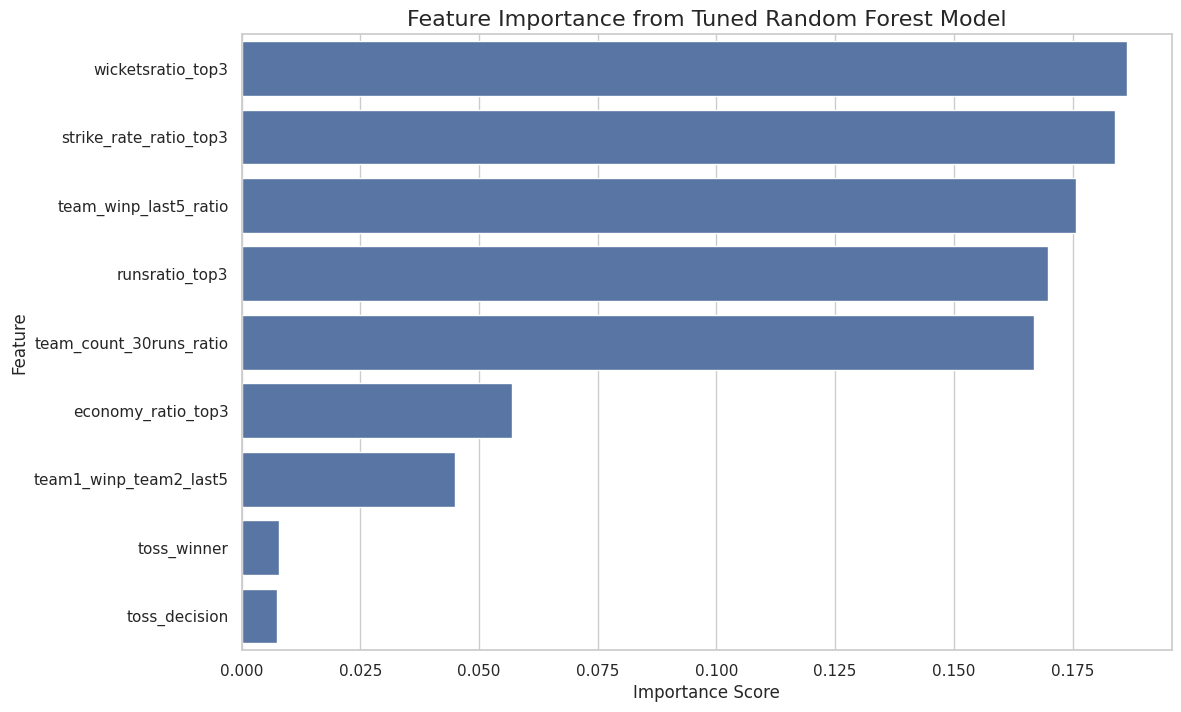

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We assume 'best_rf_model' is the tuned RandomForestClassifier from the previous step,
# and 'X_train' is our training features dataframe.

# --- 1. Extract Feature Importances ---
# The model stores the importance of each feature in the .feature_importances_ attribute.
try:
    importances = best_rf_model.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for easier visualization
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    print("--- Top 10 Most Important Features ---")
    print(feature_importance_df.head(10))
    print("-" * 40)

    # --- 2. Visualize the Importances ---
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('Feature Importance from Tuned Random Forest Model', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

except NameError:
    print("Error: 'best_rf_model' or 'X_train' not found. Please run the model tuning cell first.")



In [67]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# --- Pre-computation Step ---
# We assume 'cleaned_df', 'batsman_df', and 'bowler_df' are already loaded and sorted by date.
tqdm.pandas()

# --- Helper Functions for Feature Engineering ---

def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl_df):
    """Gets last n games stats of a player before a specified date."""
    id_col = 'batsman_id' if bat_or_bowl_df is batsman_df else 'bowler_id'
    player_matches = bat_or_bowl_df[(bat_or_bowl_df['match_dt'] < date) & (bat_or_bowl_df[id_col] == float(player_id))]
    return player_matches.tail(n)

def winpLastn(team_id, date, n, match_df):
    """Calculates a team's win percentage in their last n games."""
    df_rel = match_df[(match_df['match_dt'] < date) & ((match_df['team1_id'] == team_id) | (match_df['team2_id'] == team_id))].tail(n)
    if df_rel.shape[0] == 0: return 0
    win_count = df_rel[df_rel['winner_id'] == team_id].shape[0]
    return round(win_count * 100 / df_rel.shape[0], 2)

def winpCrossLastn(team1_id, team2_id, date, n, match_df):
    """Calculates Team 1's win percentage against Team 2 in their last n encounters."""
    df_rel = match_df[(match_df['match_dt'] < date) &
                      (((match_df['team1_id'] == team1_id) & (match_df['team2_id'] == team2_id)) |
                       ((match_df['team1_id'] == team2_id) & (match_df['team2_id'] == team1_id)))].tail(n)
    if df_rel.shape[0] == 0: return 0
    win_count = df_rel[df_rel['winner_id'] == team1_id].shape[0]
    return round(win_count * 100 / df_rel.shape[0], 2)

def winpVenue(team_id, ground_id, date, n, match_df):
    """Calculates a team's win percentage at a specific venue."""
    df_rel = match_df[(match_df['match_dt'] < date) & (match_df['ground_id'] == ground_id) &
                      ((match_df['team1_id'] == team_id) | (match_df['team2_id'] == team_id))].tail(n)
    if df_rel.shape[0] == 0: return 0
    win_count = df_rel[df_rel['winner_id'] == team_id].shape[0]
    return round(win_count * 100 / df_rel.shape[0], 2)

def calculate_top3_player_metric(player_list, date, n, df, metric_col, sort_ascending=False):
    """Generic function to calculate metrics for the top 3 players."""
    player_list = str(player_list).split(':')
    player_metrics = []
    id_col = 'batsman_id' if df is batsman_df else 'bowler_id'

    for player in player_list:
        if player == 'nan': continue
        df_rel = giveLastNgamesPlayer(player, date, n, df)
        metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
        if not np.isnan(metric_avg):
            player_metrics.append(metric_avg)

    player_metrics.sort(reverse=not sort_ascending)
    top_3_metrics = player_metrics[:3]

    if metric_col in ['runs', 'wicket_count', 'runs_scored_30', 'dots']:
        return np.nansum(top_3_metrics)
    else:
        return np.nanmean(top_3_metrics) if top_3_metrics else 0

# --- Main Feature Creation ---
model_df_v2 = cleaned_df.copy()
model_df_v2['target'] = (model_df_v2['winner_id'] == model_df_v2['team1_id']).astype(int)
batsman_df['runs_scored_30'] = (batsman_df['runs'] >= 30).astype(int)

# Existing Features (re-calculating for the new dataframe)
print("Calculating Team Form & Head-to-Head...")
team1_winp = model_df_v2.progress_apply(lambda x: winpLastn(x['team1_id'], x['match_dt'], 5, model_df_v2), axis=1)
team2_winp = model_df_v2.progress_apply(lambda x: winpLastn(x['team2_id'], x['match_dt'], 5, model_df_v2), axis=1)
model_df_v2['team_winp_last5_ratio'] = (team1_winp + 1) / (team2_winp + 1)
model_df_v2['team1_winp_team2_last5'] = model_df_v2.progress_apply(lambda x: winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5, model_df_v2), axis=1)

print("Calculating Player Performance Ratios...")
t1_runs = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'runs'), axis=1)
t2_runs = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'runs'), axis=1)
model_df_v2['runsratio_top3'] = (t1_runs + 1) / (t2_runs + 1)

t1_wkts = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, bowler_df, 'wicket_count'), axis=1)
t2_wkts = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, bowler_df, 'wicket_count'), axis=1)
model_df_v2['wicketsratio_top3'] = (t1_wkts + 1) / (t2_wkts + 1)

t1_sr = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'strike_rate'), axis=1)
t2_sr = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'strike_rate'), axis=1)
model_df_v2['strike_rate_ratio_top3'] = (t1_sr + 1) / (t2_sr + 1)

t1_econ = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, bowler_df, 'economy', sort_ascending=True), axis=1)
t2_econ = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, bowler_df, 'economy', sort_ascending=True), axis=1)
model_df_v2['economy_ratio_top3'] = (t1_econ + 1) / (t2_econ + 1)

t1_30s = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, batsman_df, 'runs_scored_30'), axis=1)
t2_30s = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, batsman_df, 'runs_scored_30'), axis=1)
model_df_v2['team_count_30runs_ratio'] = (t1_30s + 1) / (t2_30s + 1)

# **NEW FEATURES**
print("Calculating NEW features (Venue Win Ratio and Dot Ball Ratio)...")
# Venue Win Ratio
t1_venue_winp = model_df_v2.progress_apply(lambda x: winpVenue(x['team1_id'], x['ground_id'], x['match_dt'], 15, model_df_v2), axis=1)
t2_venue_winp = model_df_v2.progress_apply(lambda x: winpVenue(x['team2_id'], x['ground_id'], x['match_dt'], 15, model_df_v2), axis=1)
model_df_v2['venue_win_ratio'] = (t1_venue_winp + 1) / (t2_venue_winp + 1)

# Dot Ball Ratio
t1_dots = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team1_roster_ids'], x['match_dt'], 15, bowler_df, 'dots'), axis=1)
t2_dots = model_df_v2.progress_apply(lambda x: calculate_top3_player_metric(x['team2_roster_ids'], x['match_dt'], 15, bowler_df, 'dots'), axis=1)
model_df_v2['dot_ball_ratio'] = (t1_dots + 1) / (t2_dots + 1)

# --- Final Cleanup ---
final_features_v2 = [
    # Toss features are removed
    'team_winp_last5_ratio',
    'team1_winp_team2_last5',
    'runsratio_top3',
    'wicketsratio_top3',
    'strike_rate_ratio_top3',
    'economy_ratio_top3',
    'team_count_30runs_ratio',
    'venue_win_ratio', # New feature
    'dot_ball_ratio',  # New feature
    'target'
]

final_model_df_v2 = model_df_v2[final_features_v2].copy()
final_model_df_v2.fillna(1.0, inplace=True)

print("\n--- Feature Engineering V2 Complete ---")
print("Final dataframe shape:", final_model_df_v2.shape)
print("\nFirst 5 rows of the new modeling dataframe:")
print(final_model_df_v2.head())


Calculating Team Form & Head-to-Head...


100%|██████████| 1662/1662 [00:01<00:00, 928.38it/s]


Calculating Player Performance Ratios...


 79%|███████▉  | 1316/1662 [00:09<00:02, 158.05it/s]/tmp/ipython-input-67-3967353733.py:50: RuntimeWarning: Mean of empty slice
  metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
 79%|███████▉  | 1319/1662 [00:09<00:02, 126.31it/s]/tmp/ipython-input-67-3967353733.py:50: RuntimeWarning: Mean of empty slice
  metric_avg = np.nanmean(df_rel[metric_col]) if not df_rel.empty else 0
100%|██████████| 1662/1662 [00:11<00:00, 145.33it/s]


Calculating NEW features (Venue Win Ratio and Dot Ball Ratio)...


100%|██████████| 1662/1662 [00:10<00:00, 161.13it/s]


--- Feature Engineering V2 Complete ---
Final dataframe shape: (1662, 10)

First 5 rows of the new modeling dataframe:
   team_winp_last5_ratio  team1_winp_team2_last5  runsratio_top3  \
0                    1.0                     0.0             1.0   
1                    1.0                     0.0             1.0   
2                    1.0                     0.0            94.0   
3                    1.0                     0.0             1.0   
4                    1.0                     0.0             1.0   

   wicketsratio_top3  strike_rate_ratio_top3  economy_ratio_top3  \
0                1.0                1.000000                 1.0   
1                1.0                1.000000                 1.0   
2                2.0              146.596667                 1.0   
3                1.0                1.000000                 1.0   
4                1.0                1.000000                 1.0   

   team_count_30runs_ratio  venue_win_ratio  dot_ball_ratio  t

In [68]:
final_model_df_v2.head()

,team_winp_last5_ratio,team1_winp_team2_last5,runsratio_top3,wicketsratio_top3,strike_rate_ratio_top3,economy_ratio_top3,team_count_30runs_ratio,venue_win_ratio,dot_ball_ratio,target
0,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0
1,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0
2,1.0,0.0,94.0,2.0,146.596667,1.0,2.0,1.0,25.0,0
3,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1
4,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# We assume 'final_model_df_v2' is the dataframe from the V2 feature engineering step.

# --- 1. Separate Features (X) and Target (y) ---
try:
    X_v2 = final_model_df_v2.drop('target', axis=1)
    y_v2 = final_model_df_v2['target']
    print("Features (X_v2) and Target (y_v2) separated successfully.")
except KeyError:
    print("Error: 'target' column not found. Please ensure the feature engineering step was completed.")
except NameError:
    print("Error: 'final_model_df_v2' does not exist. Please run the previous cell first.")


# --- 2. Create Train/Test Sets ---
# We split the data into 80% for training and 20% for testing.
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_v2, y_v2, test_size=0.2, random_state=42
)

print(f"New training set size: {X_train_v2.shape[0]} matches")
print(f"New testing set size: {X_test_v2.shape[0]} matches")
print("-" * 30)

# --- 3. Train the Decision Tree Model (V2) ---
dt_model_v2 = DecisionTreeClassifier(random_state=42)
dt_model_v2.fit(X_train_v2, y_train_v2)

print("Decision Tree Model (V2) trained successfully.")
print("-" * 30)

# --- 4. Evaluate the Model ---
y_pred_v2 = dt_model_v2.predict(X_test_v2)
accuracy_v2 = accuracy_score(y_test_v2, y_pred_v2)
print(f"Model V2 Accuracy on Test Set: {accuracy_v2:.4f}")
print("-" * 30)

report_v2 = classification_report(y_test_v2, y_pred_v2, target_names=['Team2 Wins', 'Team1 Wins'])
print("Classification Report (V2):\n")
print(report_v2)



Features (X_v2) and Target (y_v2) separated successfully.
New training set size: 1329 matches
New testing set size: 333 matches
------------------------------
Decision Tree Model (V2) trained successfully.
------------------------------
Model V2 Accuracy on Test Set: 0.5135
------------------------------
Classification Report (V2):

              precision    recall  f1-score   support

  Team2 Wins       0.50      0.57      0.53       162
  Team1 Wins       0.53      0.46      0.49       171

    accuracy                           0.51       333
   macro avg       0.52      0.51      0.51       333
weighted avg       0.52      0.51      0.51       333



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# We assume X_train_v2, X_test_v2, y_train_v2, and y_test_v2 are available
# from the previous V2 Decision Tree step.

# --- 1. Train the Random Forest Model (V2) ---
rf_model_v2 = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

print("Training the Random Forest model (V2)...")
rf_model_v2.fit(X_train_v2, y_train_v2)
print("Model trained successfully.")
print("-" * 30)


# --- 2. Evaluate the Random Forest Model (V2) ---
y_pred_rf_v2 = rf_model_v2.predict(X_test_v2)
accuracy_rf_v2 = accuracy_score(y_test_v2, y_pred_rf_v2)
print(f"Random Forest Model (V2) Accuracy on Test Set: {accuracy_rf_v2:.4f}")
print("-" * 30)


# --- 3. Display the Classification Report (V2) ---
report_rf_v2 = classification_report(y_test_v2, y_pred_rf_v2, target_names=['Team2 Wins', 'Team1 Wins'])
print("Random Forest Classification Report (V2):\n")
print(report_rf_v2)



Training the Random Forest model (V2)...
Model trained successfully.
------------------------------
Random Forest Model (V2) Accuracy on Test Set: 0.5135
------------------------------
Random Forest Classification Report (V2):

              precision    recall  f1-score   support

  Team2 Wins       0.50      0.56      0.53       162
  Team1 Wins       0.53      0.47      0.50       171

    accuracy                           0.51       333
   macro avg       0.51      0.51      0.51       333
weighted avg       0.52      0.51      0.51       333



In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# We assume X_train_v2, X_test_v2, y_train_v2, and y_test_v2 are available.

# --- 1. Define the Model and Parameter Grid for Tuning ---
rf_model_v2 = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define a grid of key hyperparameters to test. This forces the model
# to try different tree structures.
param_grid_rf_v2 = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# --- 2. Set up and Run GridSearchCV ---
grid_search_rf_v2 = GridSearchCV(
    estimator=rf_model_v2,
    param_grid=param_grid_rf_v2,
    scoring='accuracy',
    cv=3, # Using 3 folds for speed
    verbose=1,
    n_jobs=-1
)

print("Starting Random Forest Hyperparameter Tuning (V2)...")
grid_search_rf_v2.fit(X_train_v2, y_train_v2)

print("\nTuning Complete.")
print(f"Best parameters found: {grid_search_rf_v2.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_rf_v2.best_score_:.4f}")
print("-" * 30)

# --- 3. Evaluate the BEST Tuned Random Forest Model (V2) ---
best_rf_model_v2 = grid_search_rf_v2.best_estimator_

# Make predictions on the unseen test data.
y_pred_tuned_rf_v2 = best_rf_model_v2.predict(X_test_v2)

# Calculate the accuracy score.
accuracy_tuned_rf_v2 = accuracy_score(y_test_v2, y_pred_tuned_rf_v2)
print(f"Tuned Random Forest (V2) Accuracy on Test Set: {accuracy_tuned_rf_v2:.4f}")
print("-" * 30)

# --- 4. Display the Classification Report ---
report_tuned_rf_v2 = classification_report(y_test_v2, y_pred_tuned_rf_v2, target_names=['Team2 Wins', 'Team1 Wins'])
print("Tuned Random Forest (V2) Classification Report:\n")
print(report_tuned_rf_v2)


Starting Random Forest Hyperparameter Tuning (V2)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Tuning Complete.
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.5493
------------------------------
Tuned Random Forest (V2) Accuracy on Test Set: 0.5315
------------------------------
Tuned Random Forest (V2) Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.52      0.58      0.55       162
  Team1 Wins       0.55      0.49      0.52       171

    accuracy                           0.53       333
   macro avg       0.53      0.53      0.53       333
weighted avg       0.53      0.53      0.53       333



In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# We assume X_train_v2, X_test_v2, y_train_v2, and y_test_v2 are available.

# --- 1. Define the Model and Parameter Grid for Tuning ---
xgb_model_v2 = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define a grid of key hyperparameters to test.
param_grid_xgb_v2 = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

# --- 2. Set up and Run GridSearchCV ---
grid_search_xgb_v2 = GridSearchCV(
    estimator=xgb_model_v2,
    param_grid=param_grid_xgb_v2,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

print("Starting XGBoost Hyperparameter Tuning (V2)...")
grid_search_xgb_v2.fit(X_train_v2, y_train_v2)

print("\nTuning Complete.")
print(f"Best parameters found: {grid_search_xgb_v2.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_xgb_v2.best_score_:.4f}")
print("-" * 30)

# --- 3. Evaluate the BEST Tuned XGBoost Model (V2) ---
best_xgb_model_v2 = grid_search_xgb_v2.best_estimator_

# Make predictions on the unseen test data.
y_pred_tuned_xgb_v2 = best_xgb_model_v2.predict(X_test_v2)

# Calculate the accuracy score.
accuracy_tuned_xgb_v2 = accuracy_score(y_test_v2, y_pred_tuned_xgb_v2)
print(f"Tuned XGBoost (V2) Accuracy on Test Set: {accuracy_tuned_xgb_v2:.4f}")
print("-" * 30)

# --- 4. Display the Classification Report ---
report_tuned_xgb_v2 = classification_report(y_test_v2, y_pred_tuned_xgb_v2, target_names=['Team2 Wins', 'Team1 Wins'])
print("Tuned XGBoost (V2) Classification Report:\n")
print(report_tuned_xgb_v2)


Starting XGBoost Hyperparameter Tuning (V2)...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Tuning Complete.
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation accuracy: 0.5327
------------------------------
Tuned XGBoost (V2) Accuracy on Test Set: 0.5105
------------------------------
Tuned XGBoost (V2) Classification Report:

              precision    recall  f1-score   support

  Team2 Wins       0.50      0.56      0.53       162
  Team1 Wins       0.53      0.46      0.49       171

    accuracy                           0.51       333
   macro avg       0.51      0.51      0.51       333
weighted avg       0.51      0.51      0.51       333

